<a href="https://colab.research.google.com/github/SvetlanaTsim/neural_networks/blob/main/lesson_1/sv_tsim_neural_networks_hw_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Введение в искусственные нейронные сети
# Урок 1. Основы обучения нейронных сетей

## Домашнее задание <a class='anchor' id='hw'>

1. Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность.
2. Проведите анализ — что приводит к ухудшению точности нейронной сети?
3. Что приводит к увеличению ее точности?


## Пример построения  двухслойной нейронной сети на numpy <a class='anchor' id='example2'>

####Импорты

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

####Вспомогательные функции

In [11]:
# вычисление сигмоидной функции
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# вычисление производной от сигмоиды
def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

# аналог one-hot-encoding
def to_one_hot(Y):
    n_col = np.max(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1
    return binarized

####Загрузка данных

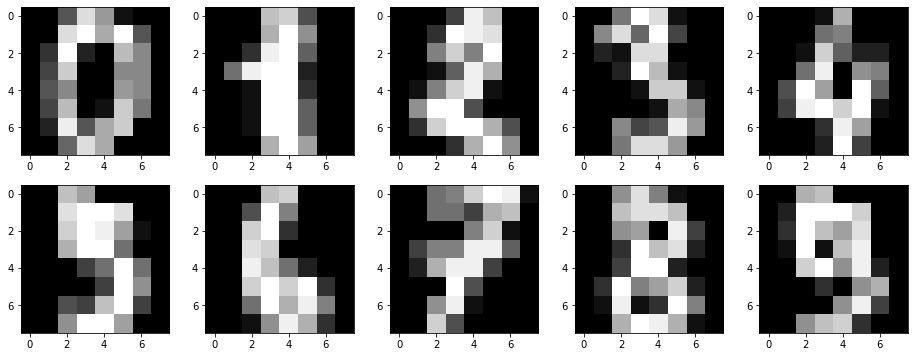

In [12]:
X, y = load_digits(return_X_y=True)
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8, 8]), cmap='gray')

####Нормализация

In [13]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

y = y.flatten()
y = to_one_hot(y)

In [14]:
display(y, y.shape)

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

(1797, 10)

In [15]:
X

array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.5625, 0.    ],
       ...,
       [0.    , 0.    , 0.0625, ..., 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.75  , 0.0625, 0.    ]])

####Разделение данных на тренировочные и тестовые

In [16]:
# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
X_train.shape, X_test.shape

((1203, 64), (594, 64))

####Функция для обучения нейросети

In [20]:
# функция для обучения нейросети
def neural_network_fit(X_train, y_train, neuron_numb, learning_rate, num_epochs):

  # присваивание случайных весов
  np.random.seed(1)
  w0 = np.random.random((64, neuron_numb))  # для входного слоя    - 64 входа, neuron_numb выходов
  w1 = np.random.random((neuron_numb, 10))  # для внутреннего слоя - neuron_numb входов, 10 выходов

  # массив для ошибок, чтобы потом построить график
  errors = []
  metrics = []

  # процесс обучения
  for i in range(num_epochs):

      # прямое распространение(feed forward)
      layer0 = X_train
      layer1 = sigmoid(np.dot(layer0, w0))
      layer2 = sigmoid(np.dot(layer1, w1))

      # обратное распространение (back propagation)
      # с использованием градиентного спуска
      layer2_error = layer2 - y_train  # производная функции потерь
      layer2_grad = layer2_error * sigmoid_deriv(layer2)
      
      layer1_error = layer2_grad.dot(w1.T)
      layer1_grad = layer1_error * sigmoid_deriv(layer1)
      
      w1 -= layer1.T.dot(layer2_grad) * learning_rate
      w0 -= layer0.T.dot(layer1_grad) * learning_rate
      
      # ошибка модели
      error = np.mean(np.abs(layer2_error))
      errors.append(error)
      
      # метрики качества
      preds = np.argmax(layer2, axis=1)
      labels = np.argmax(y_train, axis=1)
      accuracy = (preds == labels).sum() * 100 / len(labels)
      metrics.append(accuracy)

  return w0, w1, errors, metrics, accuracy



#### Зададим параматры для исследования

In [21]:
# определим число нейронов скрытого слоя
neuron_numb = [5, 10, 20, 50]

# скорость обучения (learning rate)
learning_rate = [0.1, 0.01, 0.001]

# количество итераций
num_epochs = [100, 300, 500, 1000]

#### Иссследуем приведенные выше параметры и найдем лучшие на основе полученного параметра accuracy 

Число нейронов скрытого слоя = 5
Cкорость обучения = 0.1
Количество итераций = 100
Accuracy на трейне  = 20.199501246882793


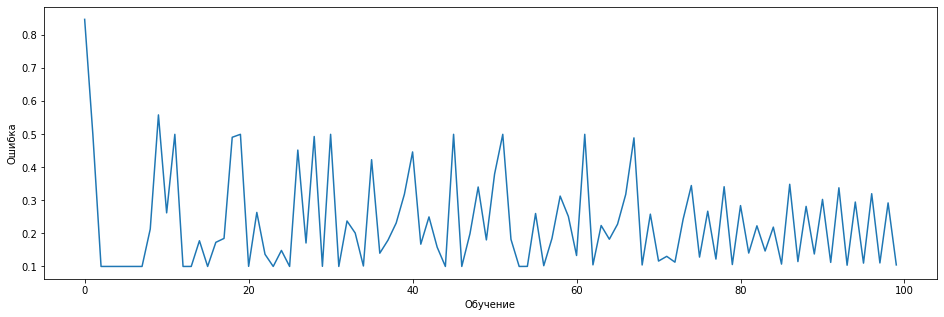

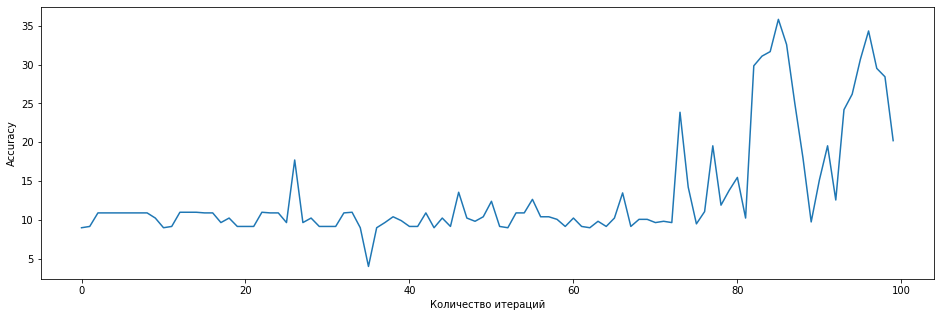

Число нейронов скрытого слоя = 5
Cкорость обучения = 0.1
Количество итераций = 300
Accuracy на трейне  = 47.464671654197836


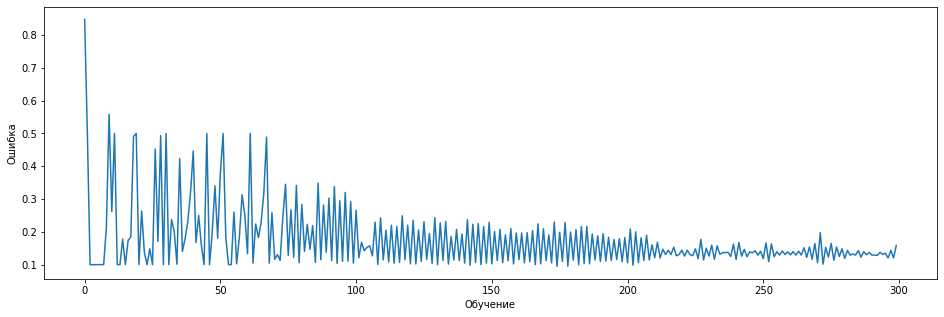

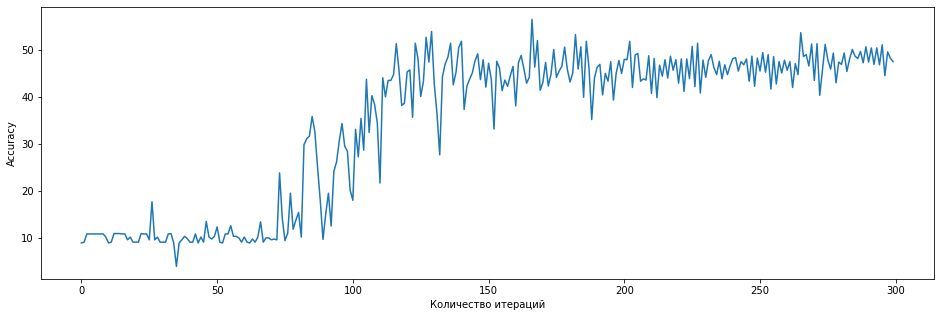

Число нейронов скрытого слоя = 5
Cкорость обучения = 0.1
Количество итераций = 500
Accuracy на трейне  = 56.442227763923526


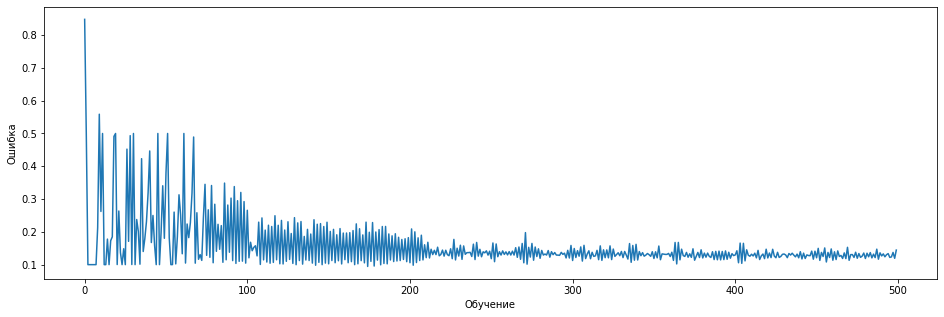

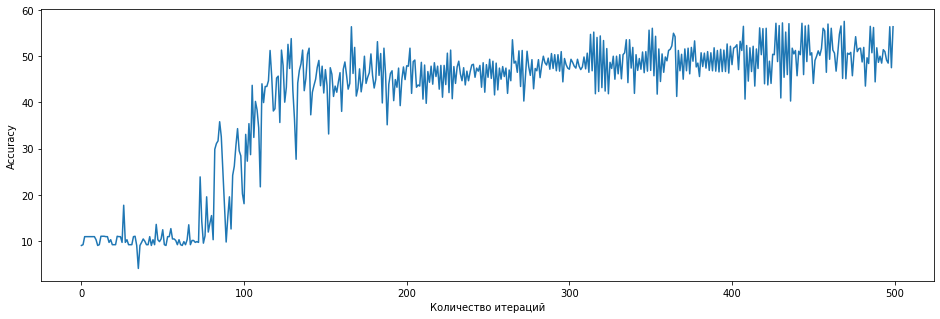

Число нейронов скрытого слоя = 5
Cкорость обучения = 0.1
Количество итераций = 1000
Accuracy на трейне  = 47.963424771404824


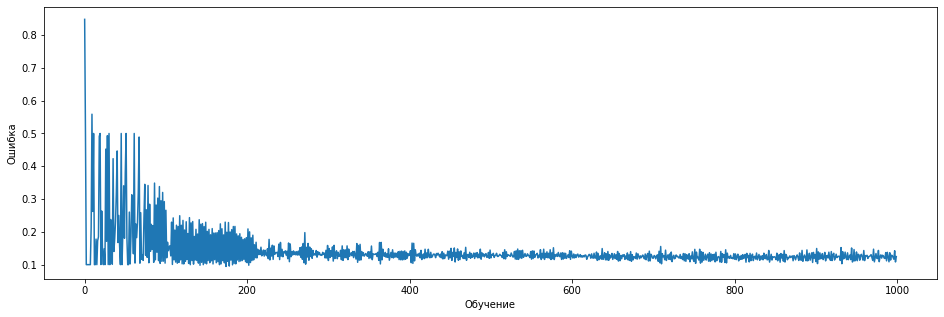

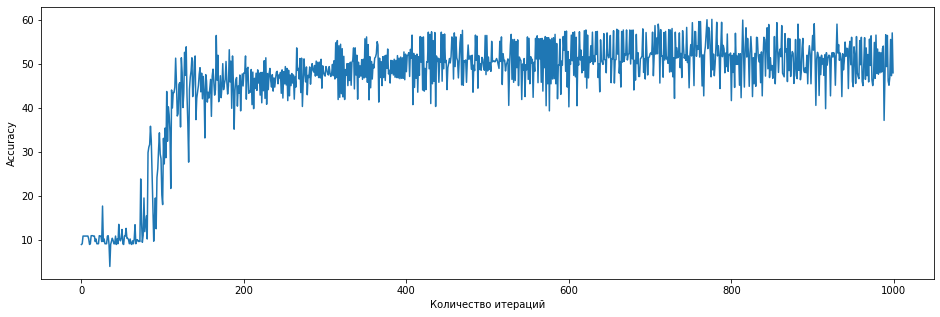

Число нейронов скрытого слоя = 5
Cкорость обучения = 0.01
Количество итераций = 100
Accuracy на трейне  = 49.62593516209476


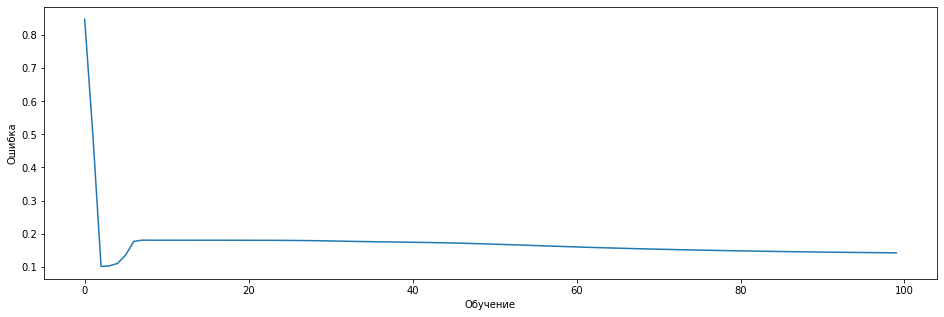

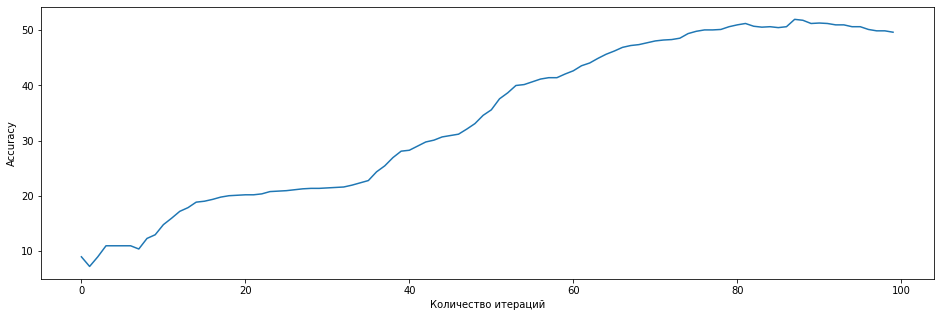

Число нейронов скрытого слоя = 5
Cкорость обучения = 0.01
Количество итераций = 300
Accuracy на трейне  = 52.535328345802164


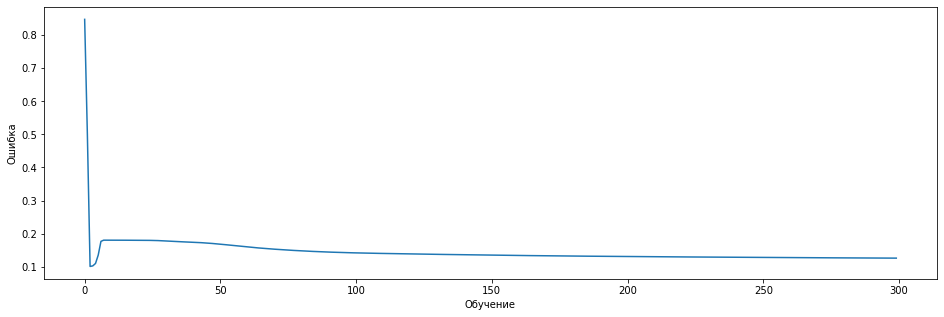

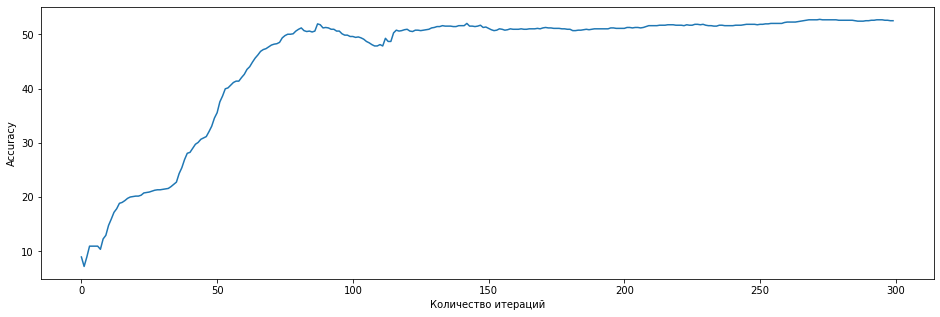

Число нейронов скрытого слоя = 5
Cкорость обучения = 0.01
Количество итераций = 500
Accuracy на трейне  = 55.86034912718205


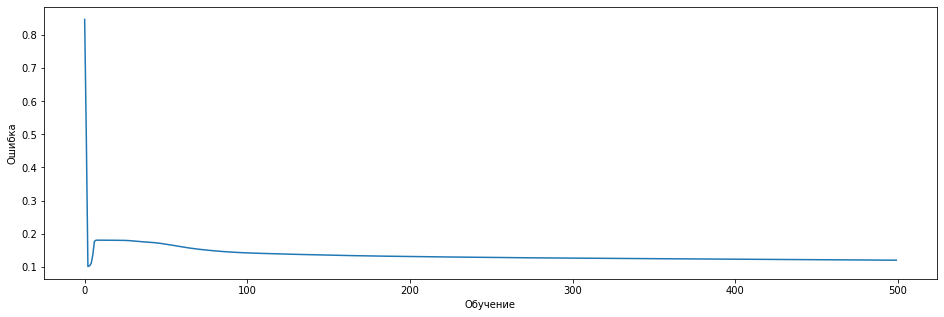

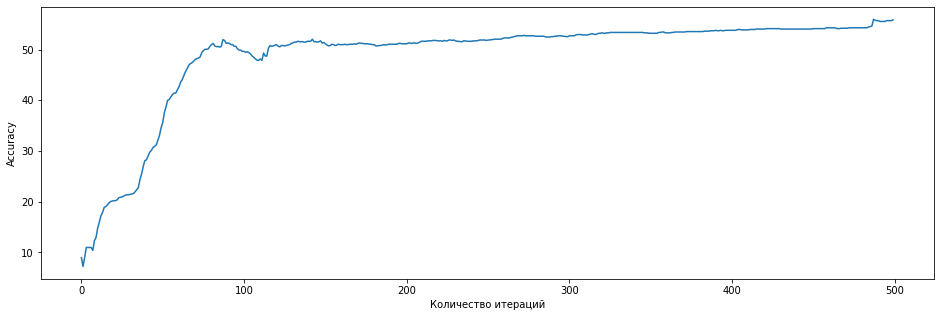

Число нейронов скрытого слоя = 5
Cкорость обучения = 0.01
Количество итераций = 1000
Accuracy на трейне  = 60.099750623441395


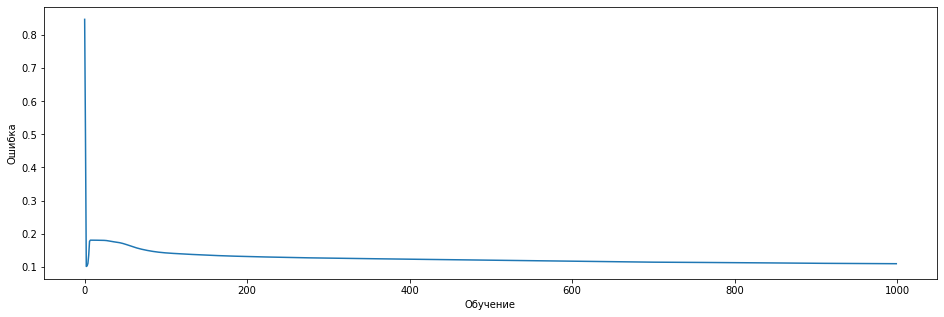

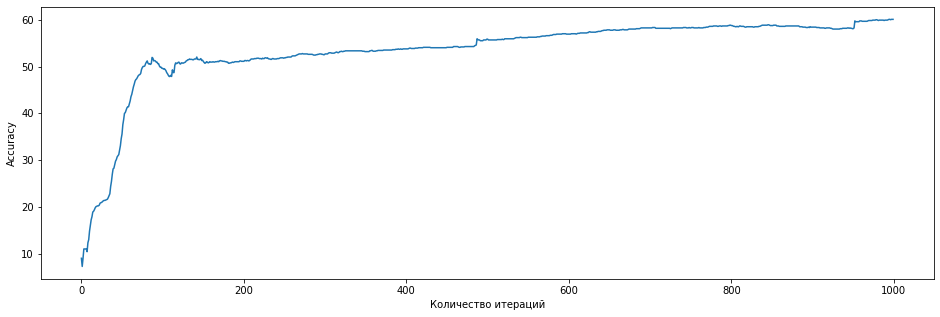

Число нейронов скрытого слоя = 5
Cкорость обучения = 0.001
Количество итераций = 100
Accuracy на трейне  = 10.972568578553616


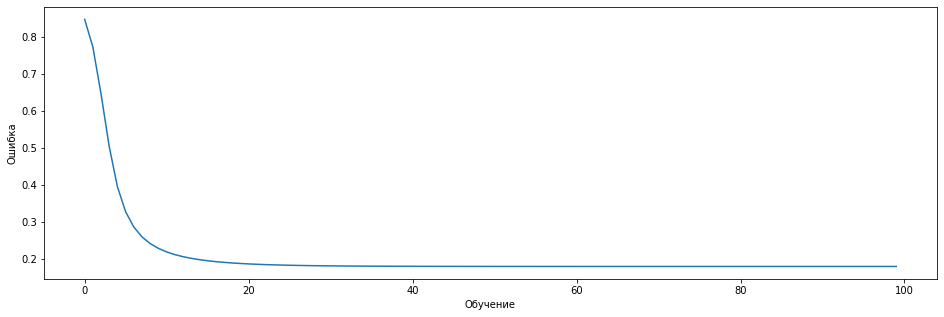

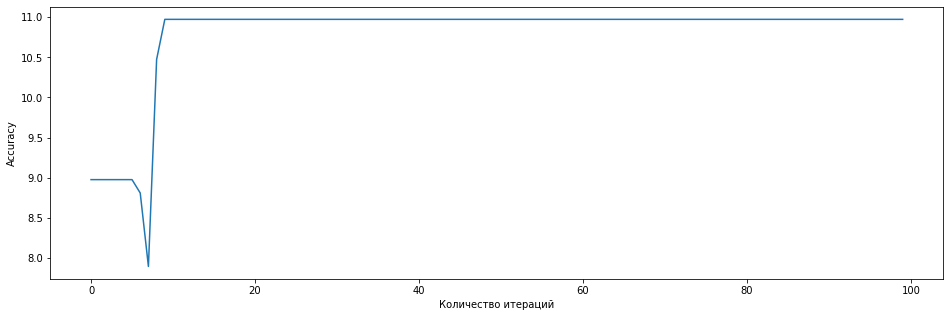

Число нейронов скрытого слоя = 5
Cкорость обучения = 0.001
Количество итераций = 300
Accuracy на трейне  = 21.44638403990025


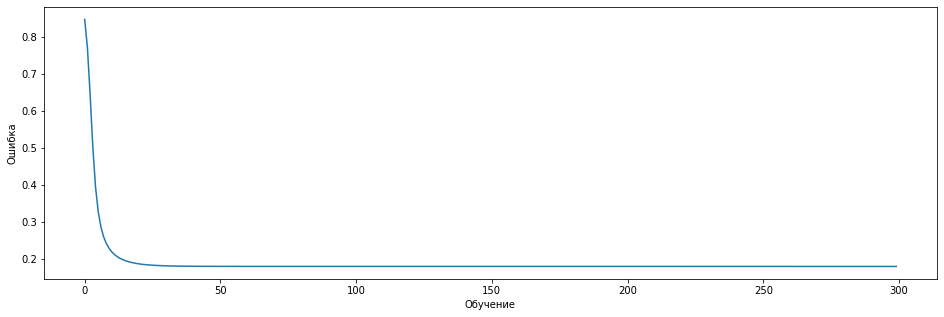

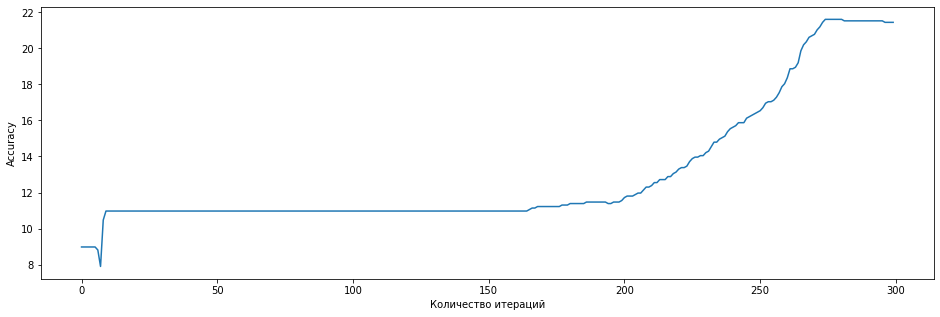

Число нейронов скрытого слоя = 5
Cкорость обучения = 0.001
Количество итераций = 500
Accuracy на трейне  = 21.945137157107233


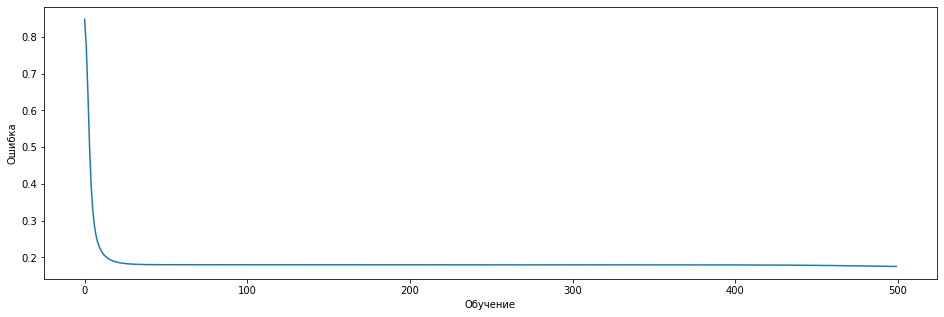

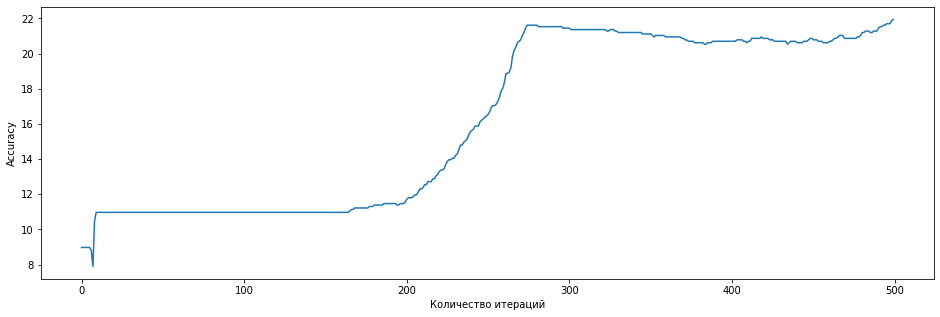

Число нейронов скрытого слоя = 5
Cкорость обучения = 0.001
Количество итераций = 1000
Accuracy на трейне  = 51.20532003325021


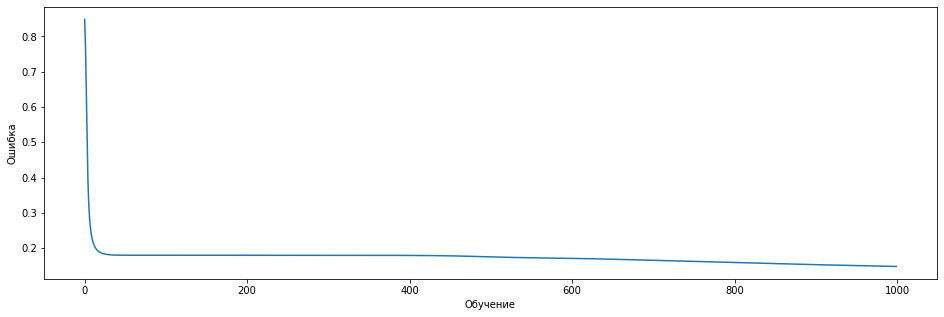

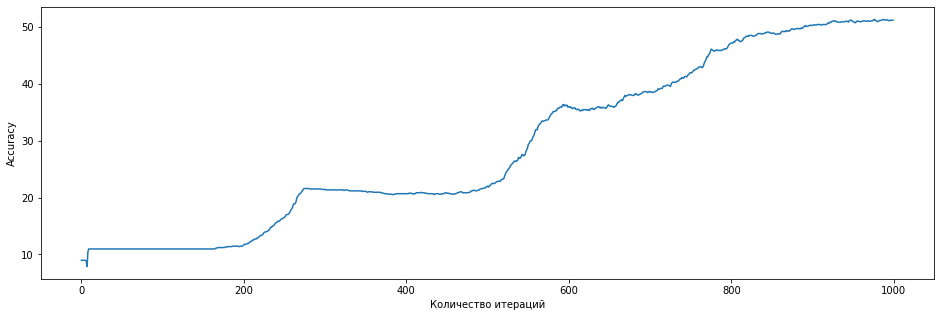

Число нейронов скрытого слоя = 10
Cкорость обучения = 0.1
Количество итераций = 100
Accuracy на трейне  = 75.47797173732336


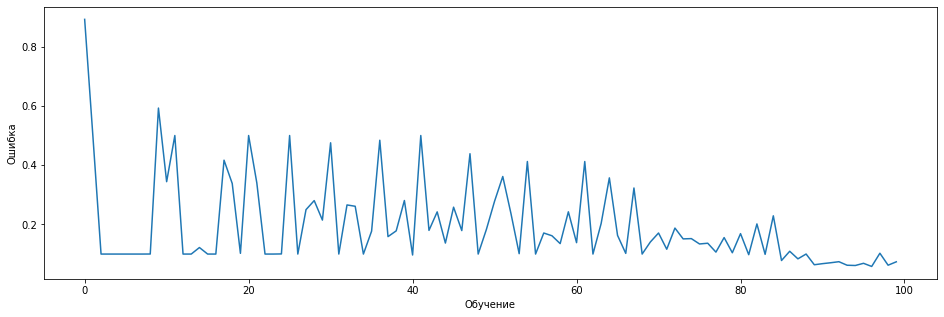

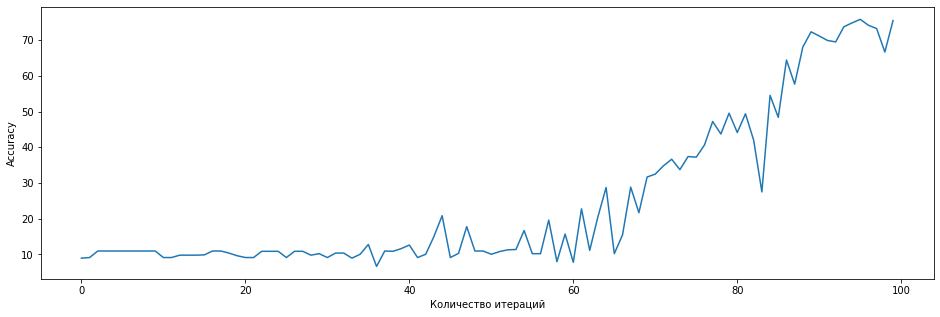

Число нейронов скрытого слоя = 10
Cкорость обучения = 0.1
Количество итераций = 300
Accuracy на трейне  = 88.02992518703242


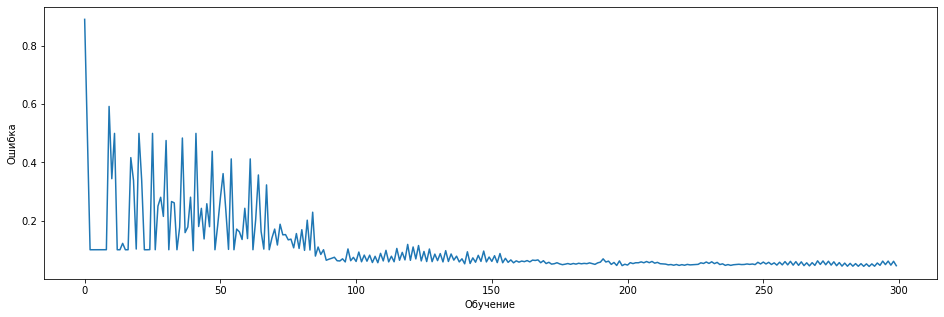

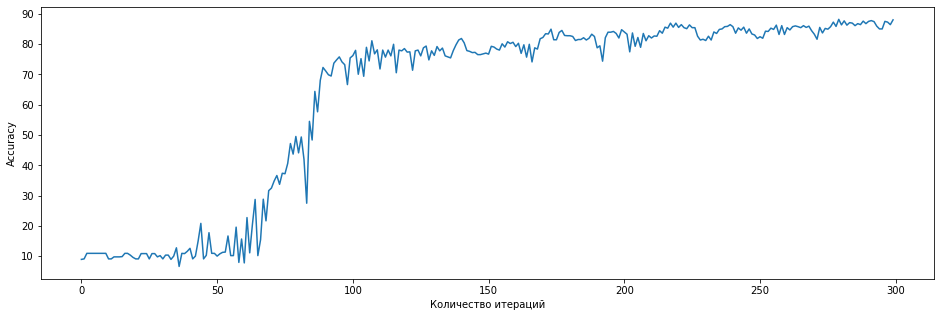

Число нейронов скрытого слоя = 10
Cкорость обучения = 0.1
Количество итераций = 500
Accuracy на трейне  = 89.85868661679136


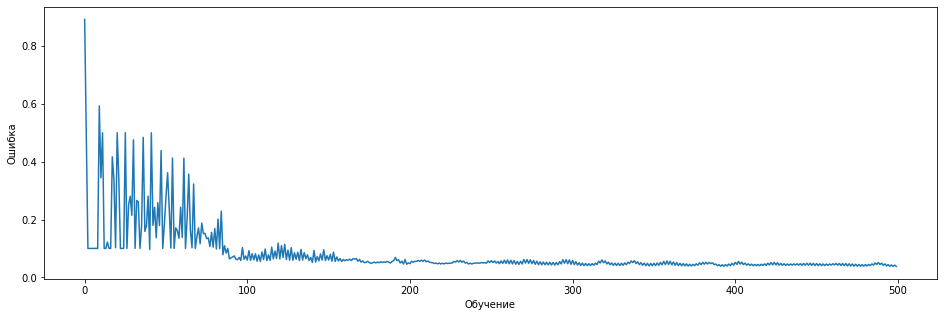

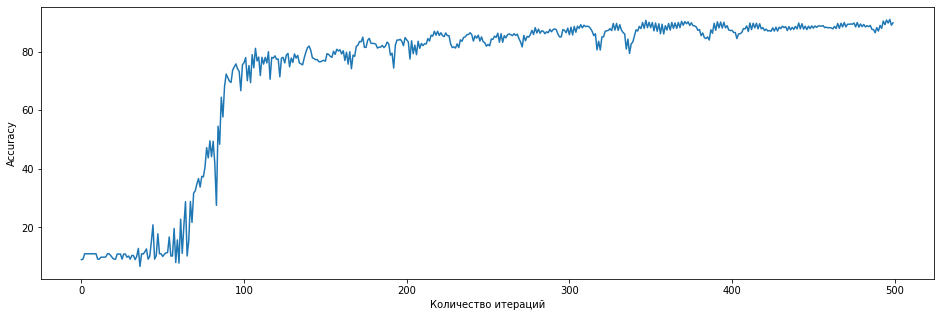

Число нейронов скрытого слоя = 10
Cкорость обучения = 0.1
Количество итераций = 1000
Accuracy на трейне  = 89.52618453865337


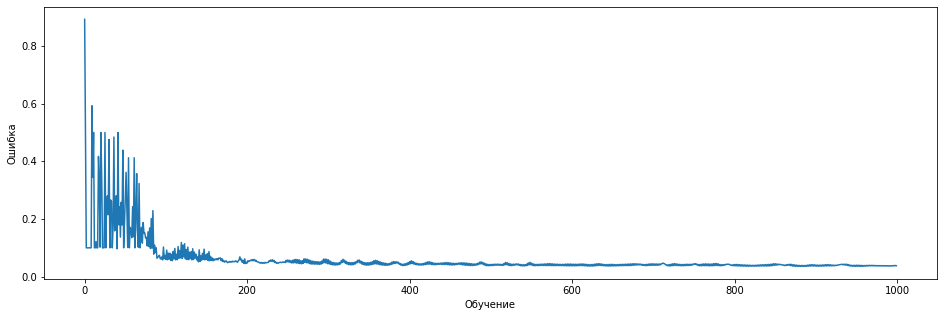

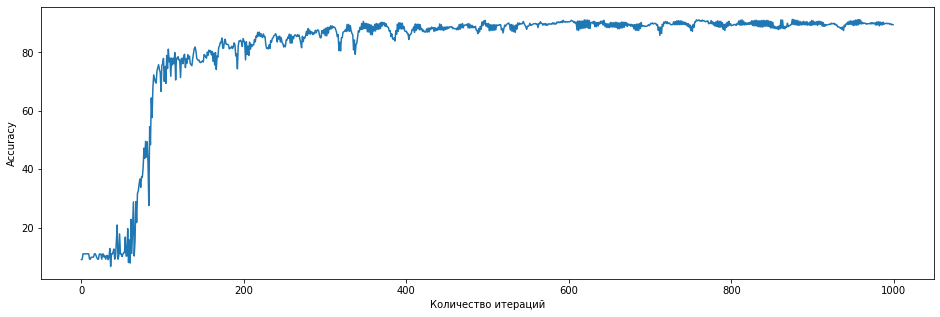

Число нейронов скрытого слоя = 10
Cкорость обучения = 0.01
Количество итераций = 100
Accuracy на трейне  = 77.1404821280133


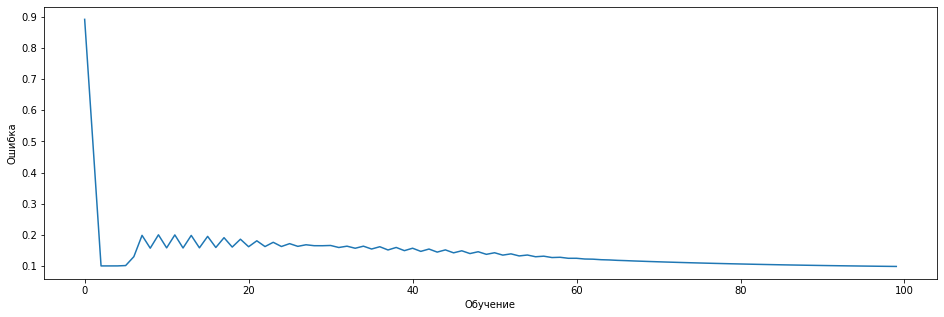

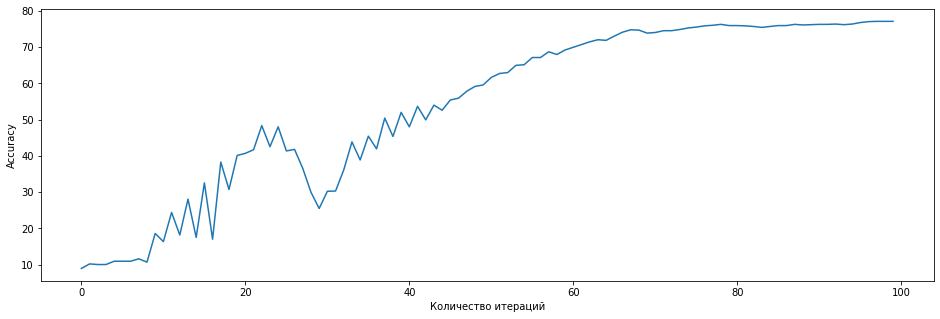

Число нейронов скрытого слоя = 10
Cкорость обучения = 0.01
Количество итераций = 300
Accuracy на трейне  = 79.21862011637573


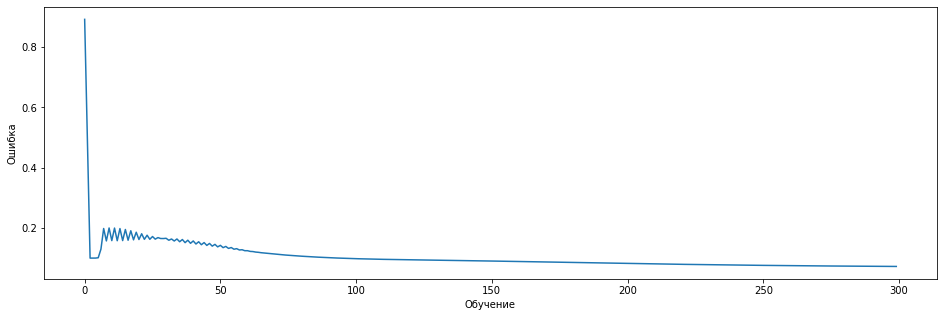

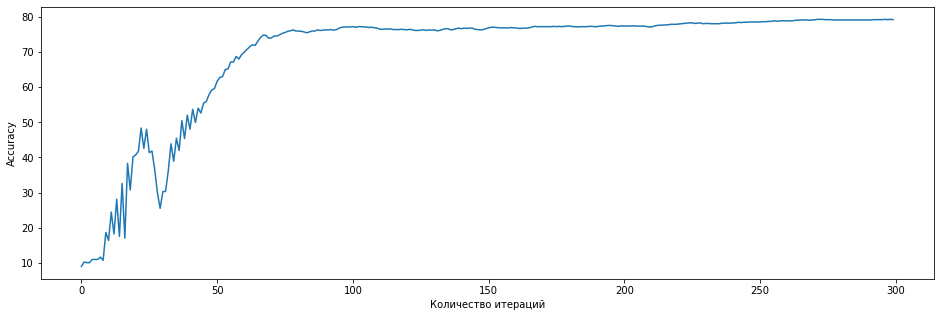

Число нейронов скрытого слоя = 10
Cкорость обучения = 0.01
Количество итераций = 500
Accuracy на трейне  = 80.29925187032418


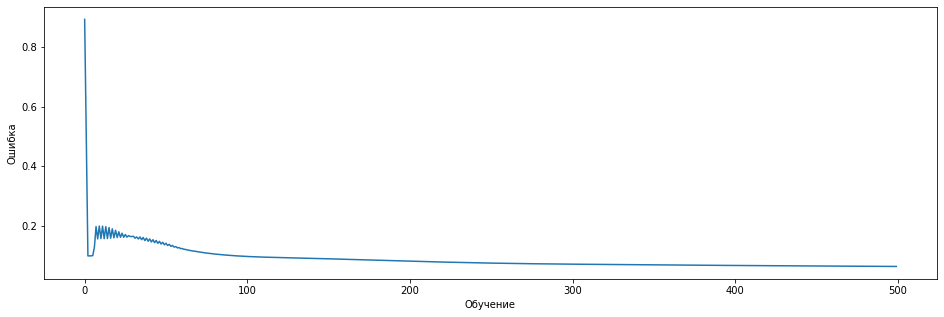

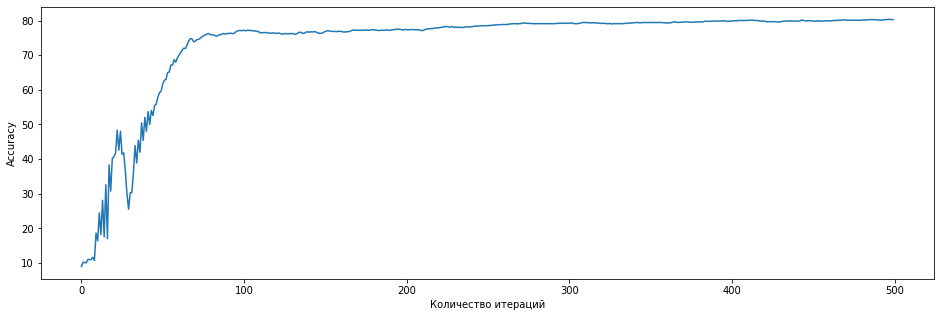

Число нейронов скрытого слоя = 10
Cкорость обучения = 0.01
Количество итераций = 1000
Accuracy на трейне  = 82.7930174563591


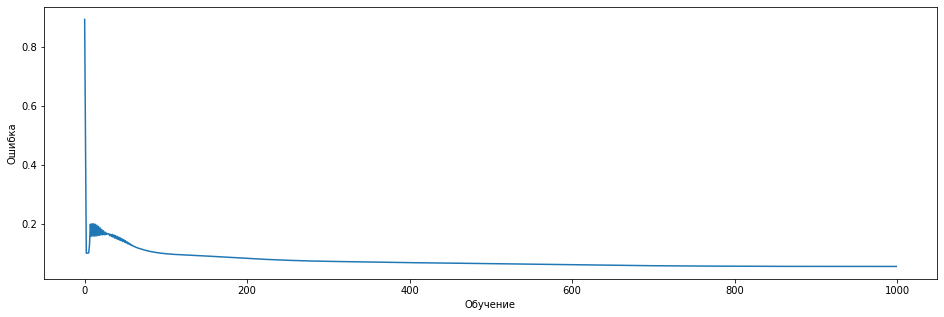

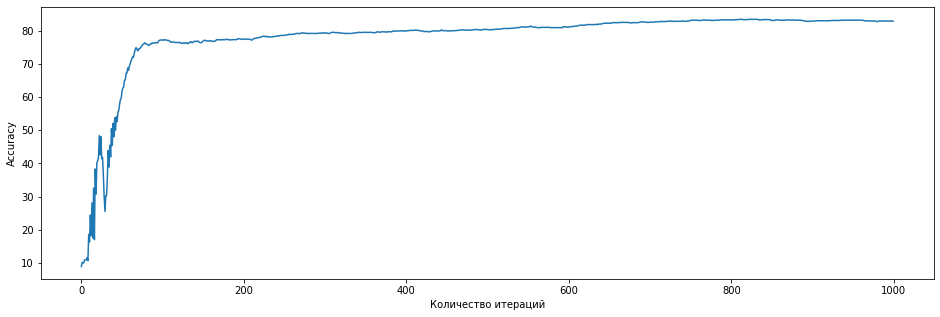

Число нейронов скрытого слоя = 10
Cкорость обучения = 0.001
Количество итераций = 100
Accuracy на трейне  = 11.055694098088113


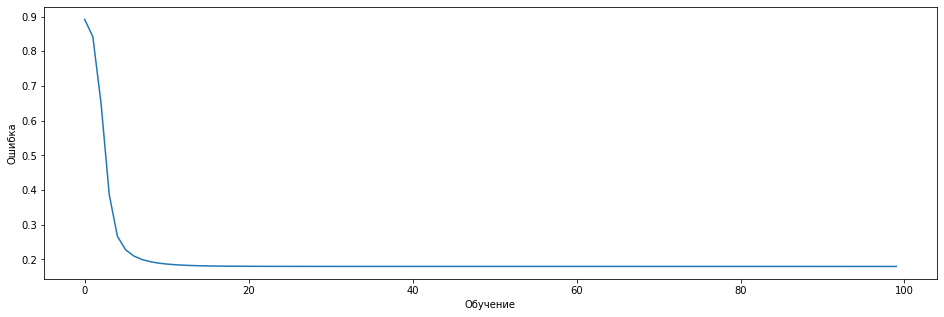

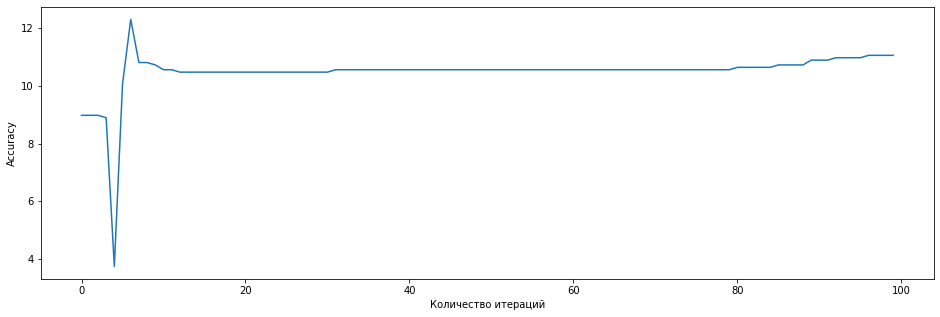

Число нейронов скрытого слоя = 10
Cкорость обучения = 0.001
Количество итераций = 300
Accuracy на трейне  = 29.842061512884456


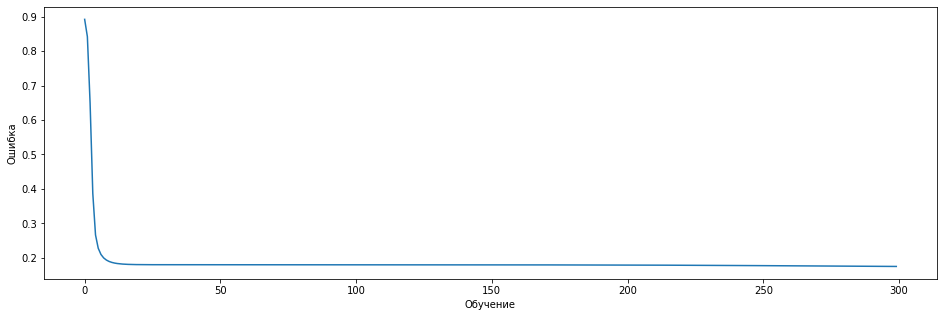

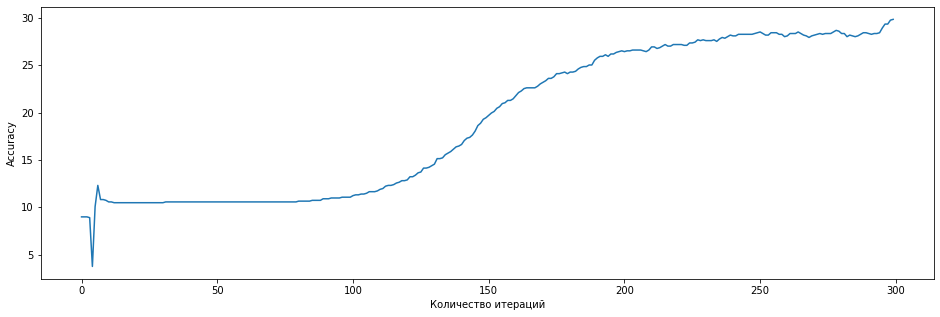

Число нейронов скрытого слоя = 10
Cкорость обучения = 0.001
Количество итераций = 500
Accuracy на трейне  = 53.61596009975062


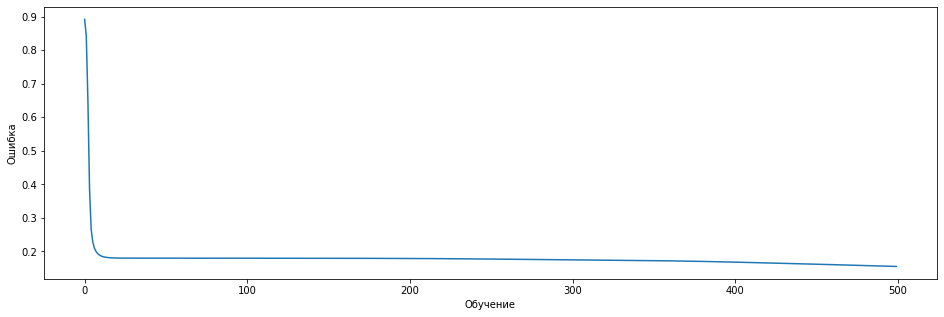

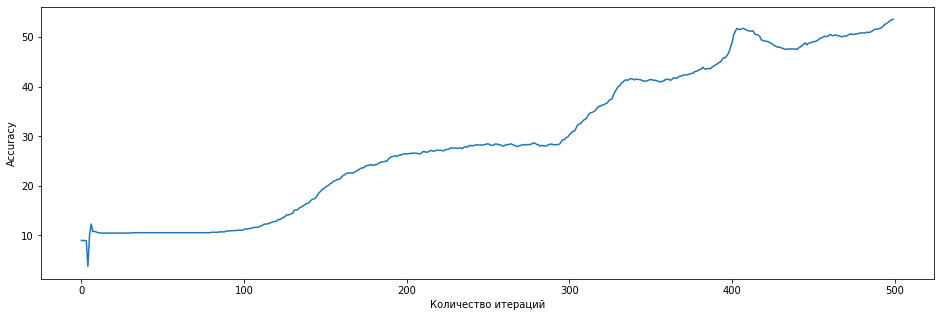

Число нейронов скрытого слоя = 10
Cкорость обучения = 0.001
Количество итераций = 1000
Accuracy на трейне  = 70.40731504571903


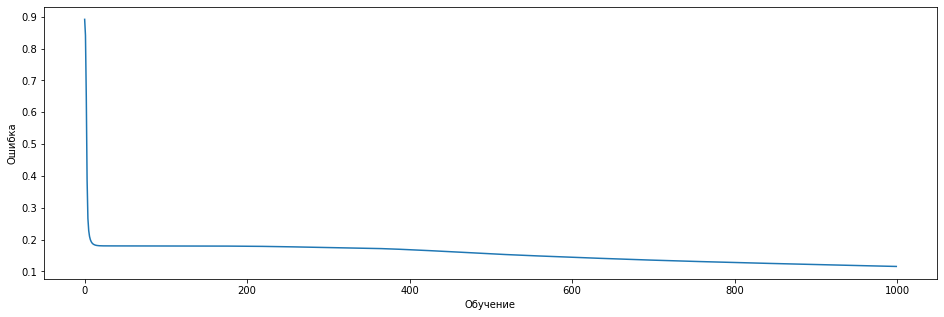

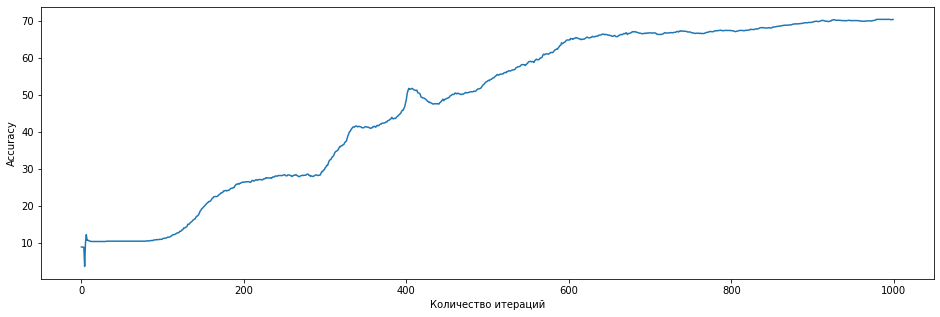

Число нейронов скрытого слоя = 20
Cкорость обучения = 0.1
Количество итераций = 100
Accuracy на трейне  = 60.93100581878637


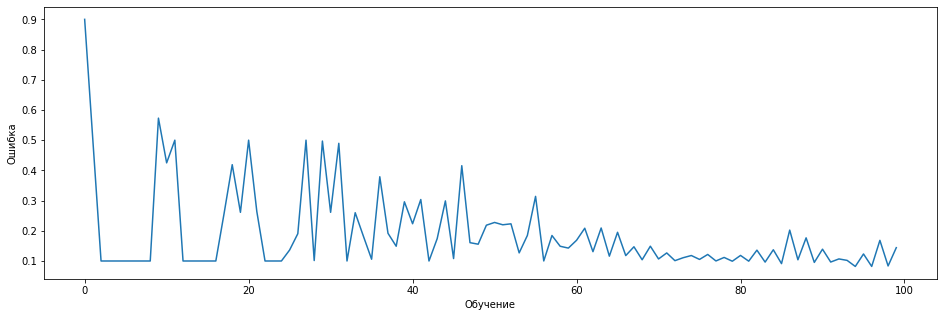

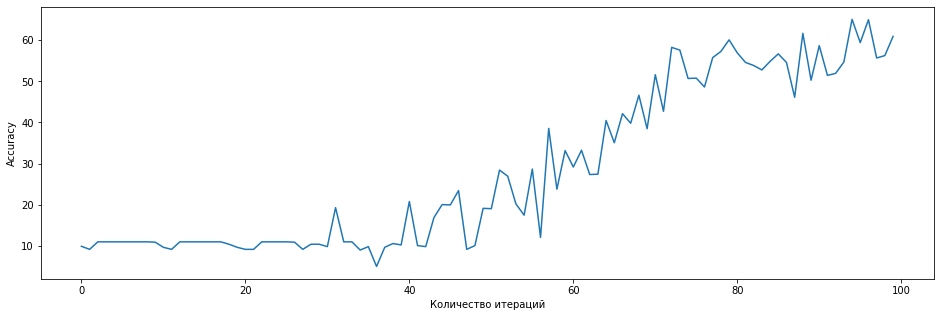

Число нейронов скрытого слоя = 20
Cкорость обучения = 0.1
Количество итераций = 300
Accuracy на трейне  = 89.02743142144638


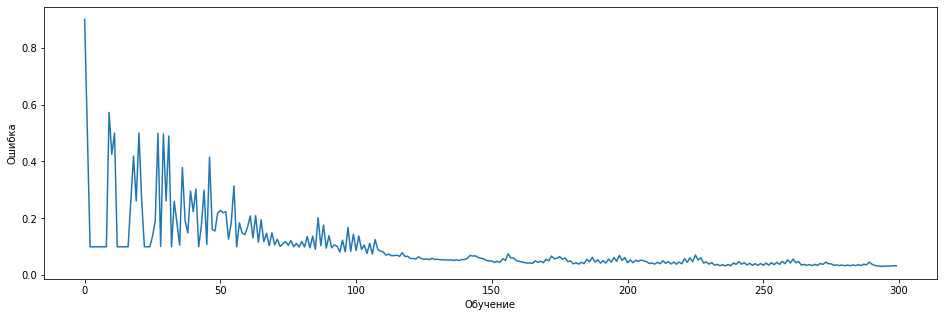

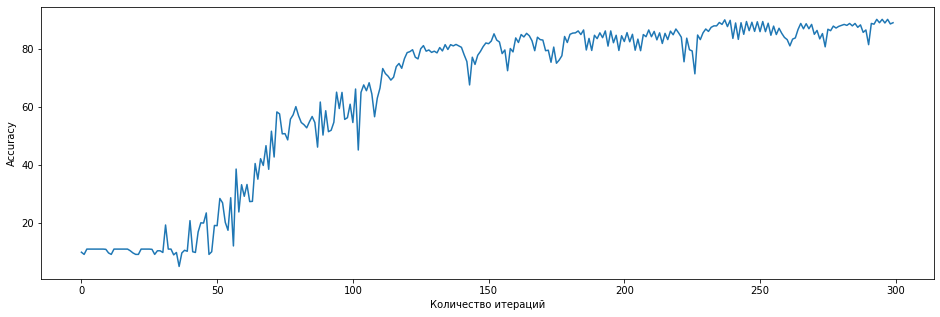

Число нейронов скрытого слоя = 20
Cкорость обучения = 0.1
Количество итераций = 500
Accuracy на трейне  = 88.2793017456359


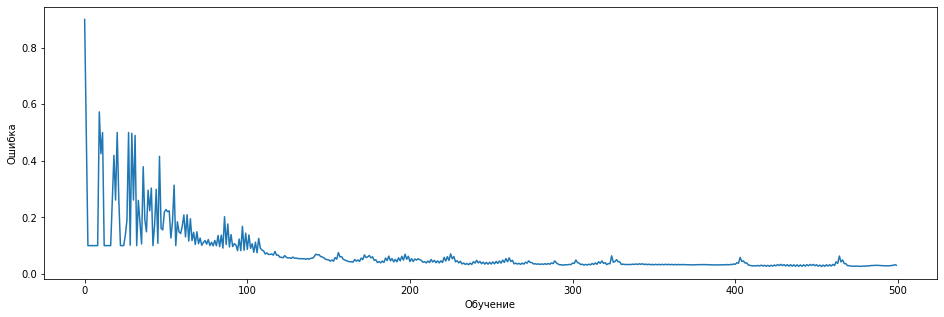

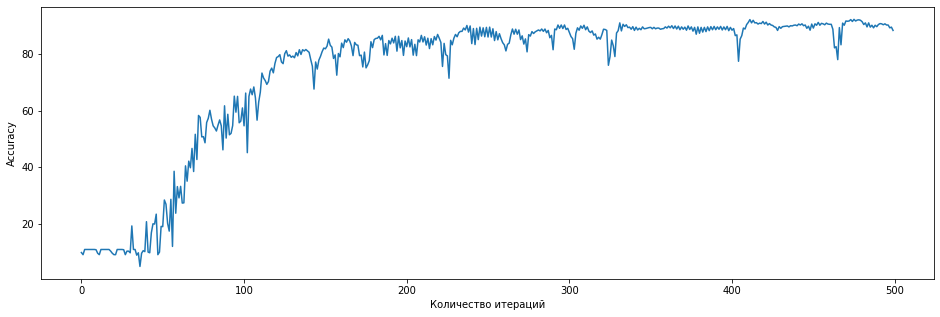

Число нейронов скрытого слоя = 20
Cкорость обучения = 0.1
Количество итераций = 1000
Accuracy на трейне  = 90.52369077306733


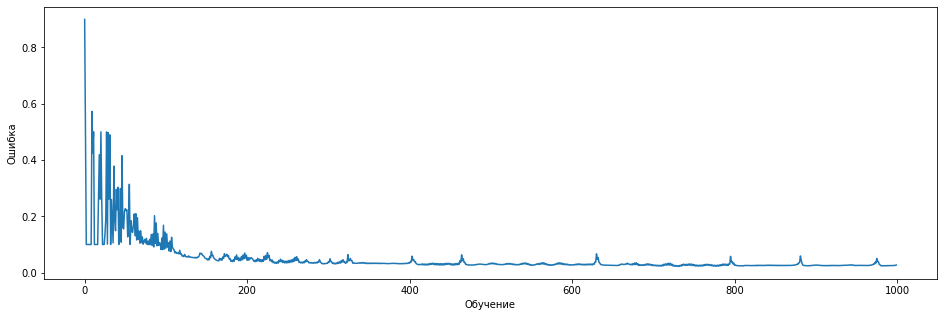

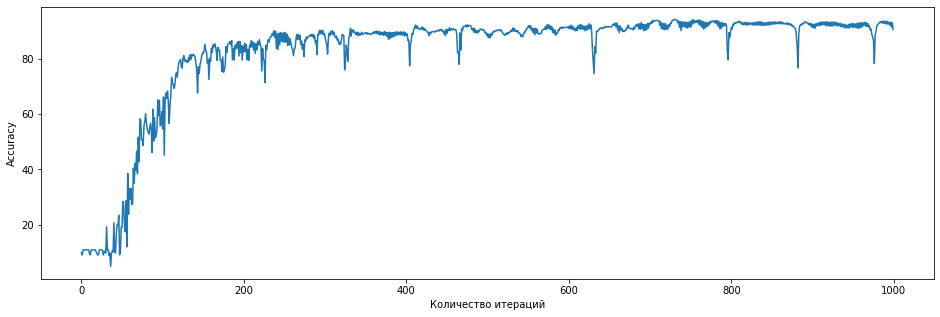

Число нейронов скрытого слоя = 20
Cкорость обучения = 0.01
Количество итераций = 100
Accuracy на трейне  = 92.60182876142976


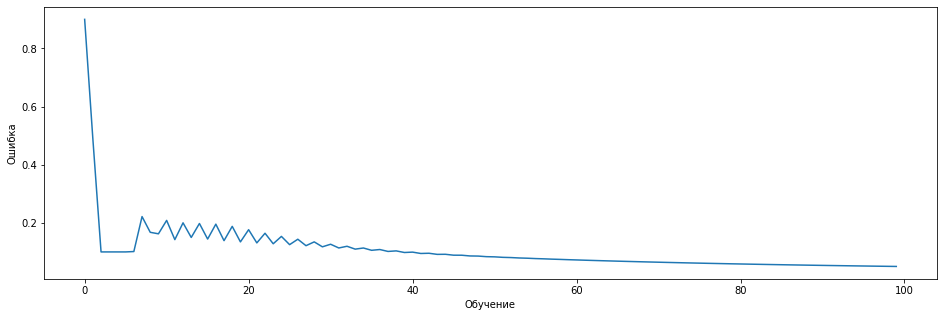

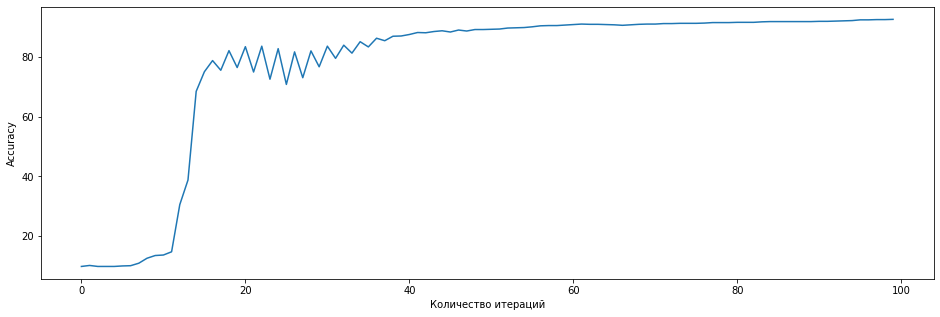

Число нейронов скрытого слоя = 20
Cкорость обучения = 0.01
Количество итераций = 300
Accuracy на трейне  = 95.67747298420615


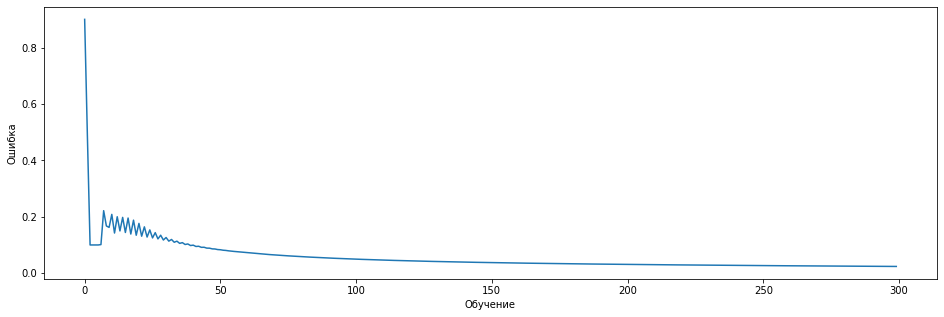

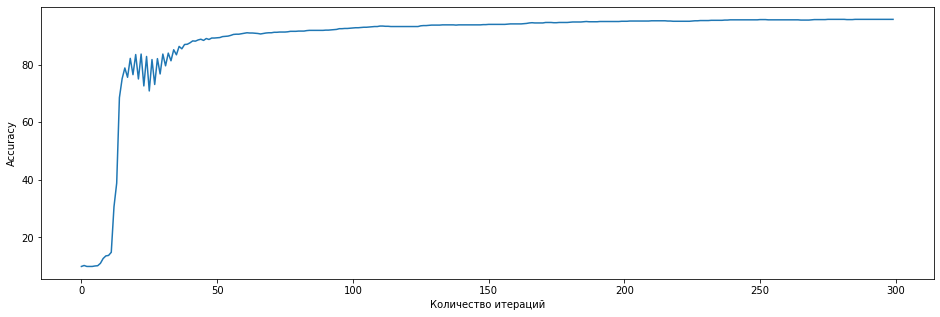

Число нейронов скрытого слоя = 20
Cкорость обучения = 0.01
Количество итераций = 500
Accuracy на трейне  = 97.0074812967581


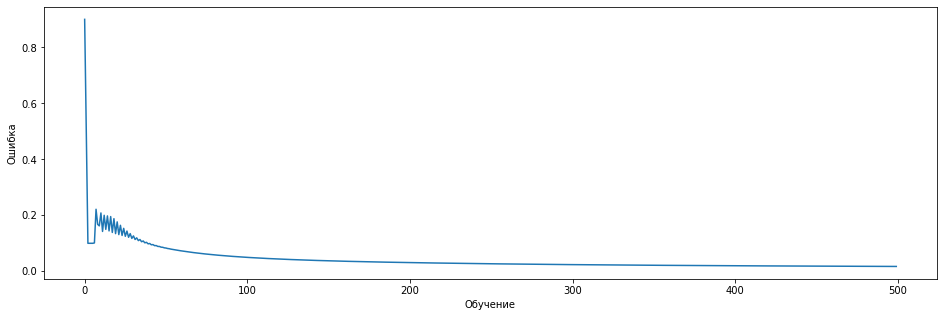

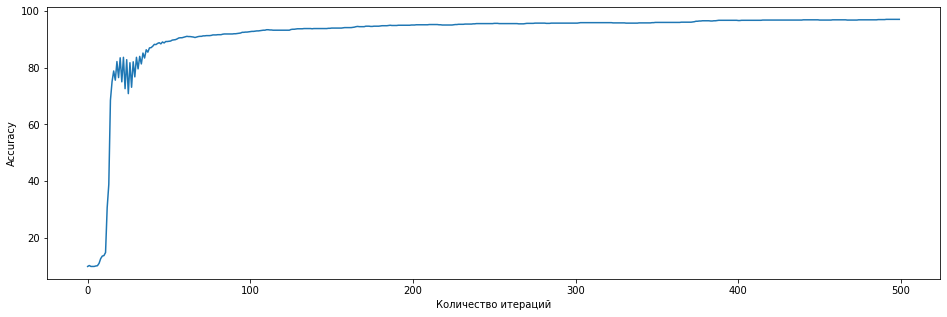

Число нейронов скрытого слоя = 20
Cкорость обучения = 0.01
Количество итераций = 1000
Accuracy на трейне  = 98.50374064837905


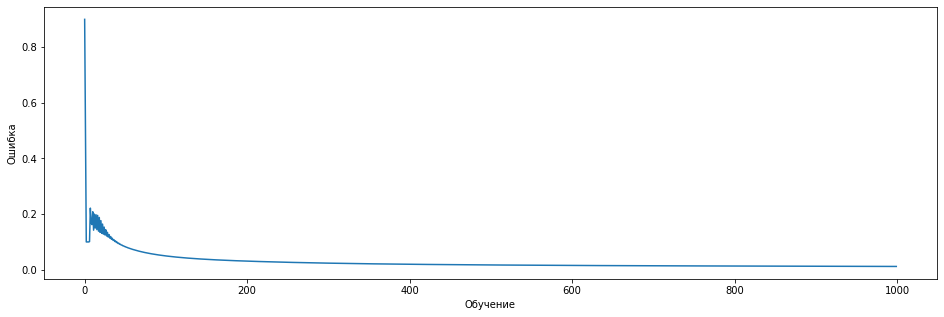

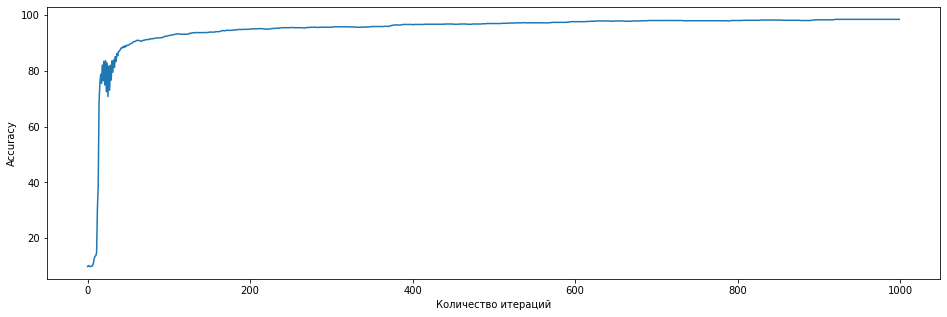

Число нейронов скрытого слоя = 20
Cкорость обучения = 0.001
Количество итераций = 100
Accuracy на трейне  = 20.199501246882793


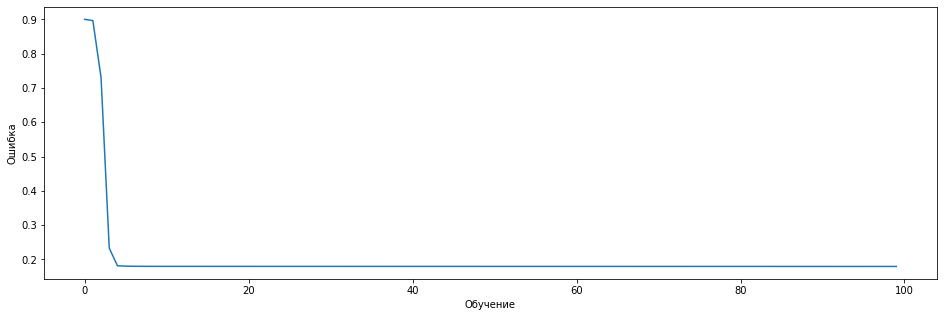

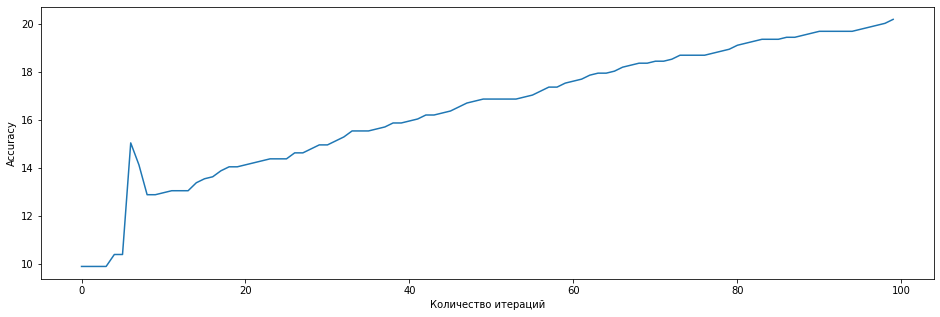

Число нейронов скрытого слоя = 20
Cкорость обучения = 0.001
Количество итераций = 300
Accuracy на трейне  = 38.73649210307565


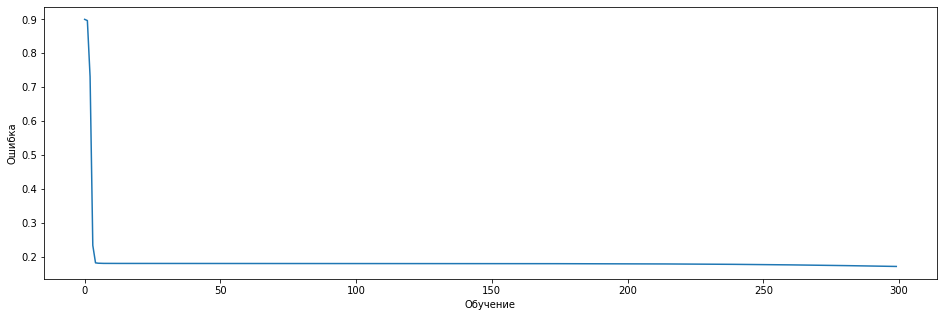

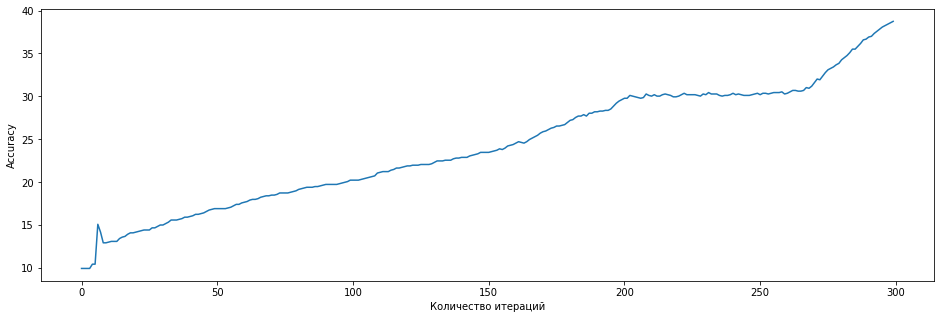

Число нейронов скрытого слоя = 20
Cкорость обучения = 0.001
Количество итераций = 500
Accuracy на трейне  = 65.08728179551122


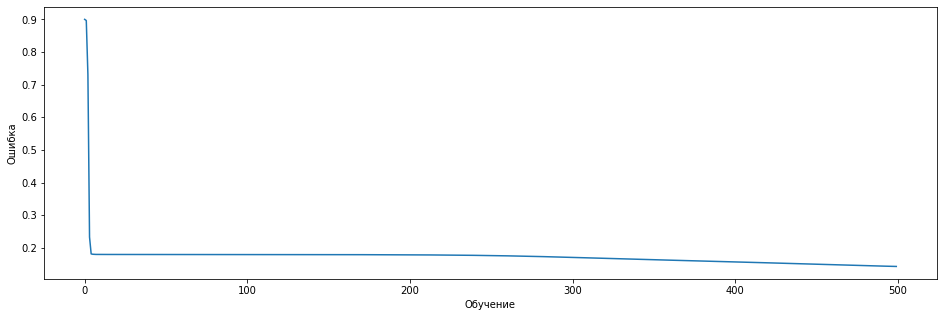

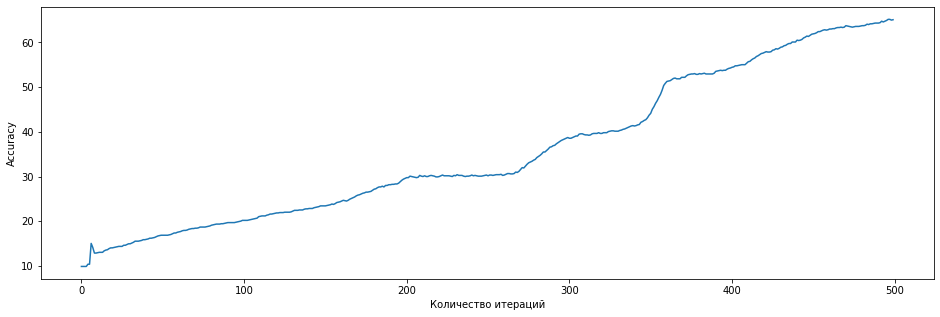

Число нейронов скрытого слоя = 20
Cкорость обучения = 0.001
Количество итераций = 1000
Accuracy на трейне  = 83.12551953449709


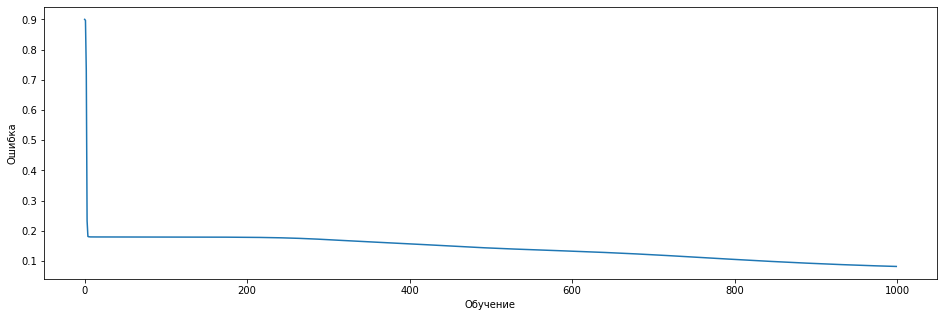

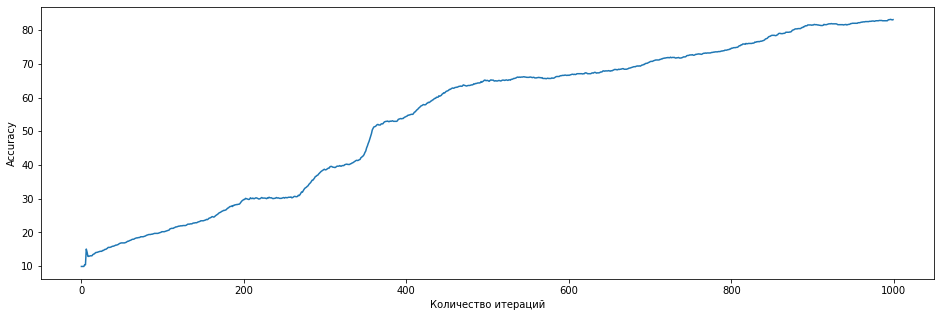

Число нейронов скрытого слоя = 50
Cкорость обучения = 0.1
Количество итераций = 100
Accuracy на трейне  = 82.8761429758936


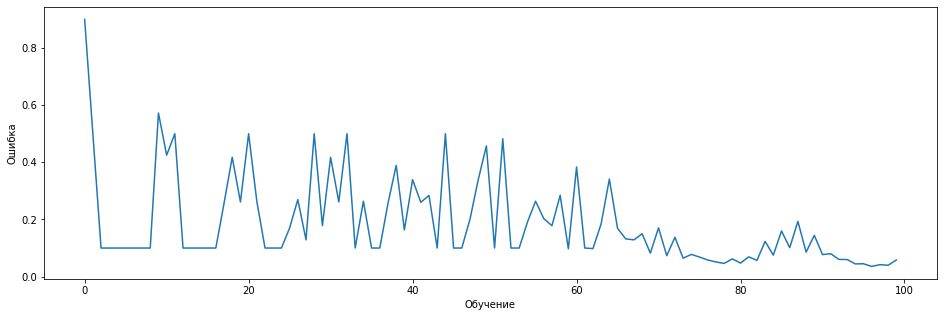

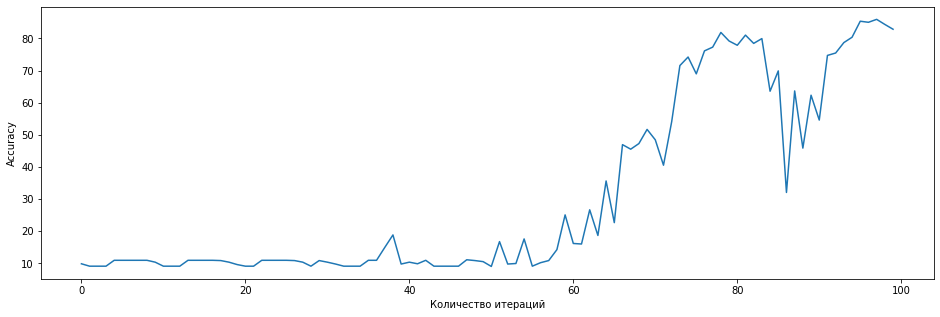

Число нейронов скрытого слоя = 50
Cкорость обучения = 0.1
Количество итераций = 300
Accuracy на трейне  = 94.01496259351622


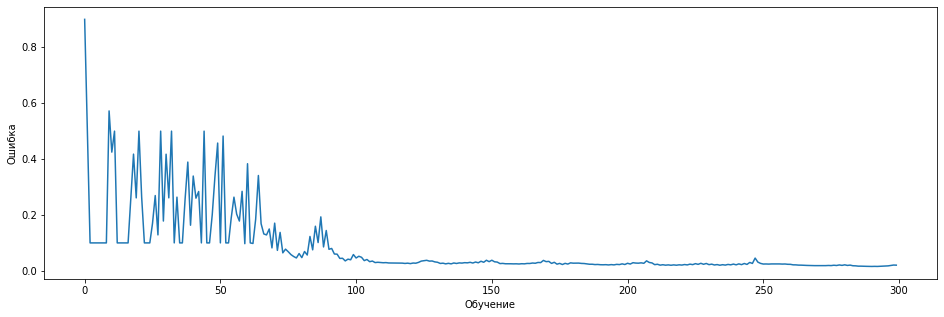

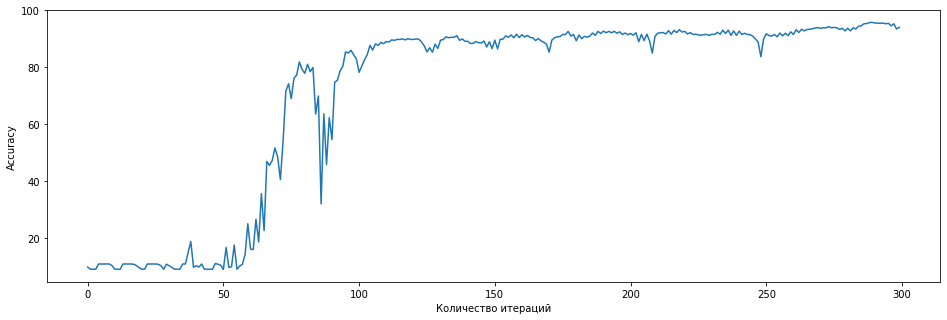

Число нейронов скрытого слоя = 50
Cкорость обучения = 0.1
Количество итераций = 500
Accuracy на трейне  = 98.00498753117208


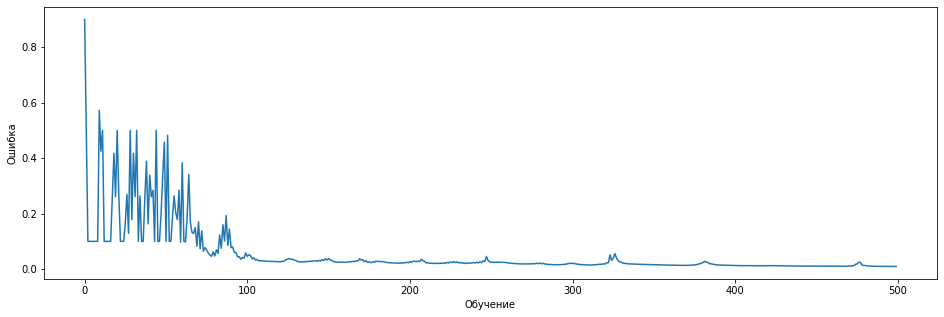

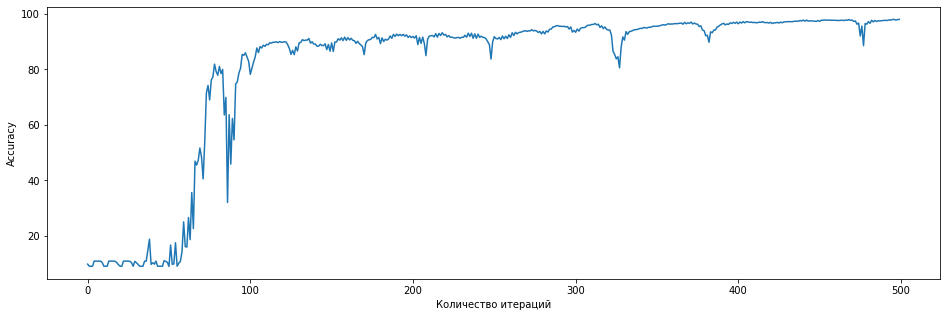

Число нейронов скрытого слоя = 50
Cкорость обучения = 0.1
Количество итераций = 1000
Accuracy на трейне  = 97.58935993349958


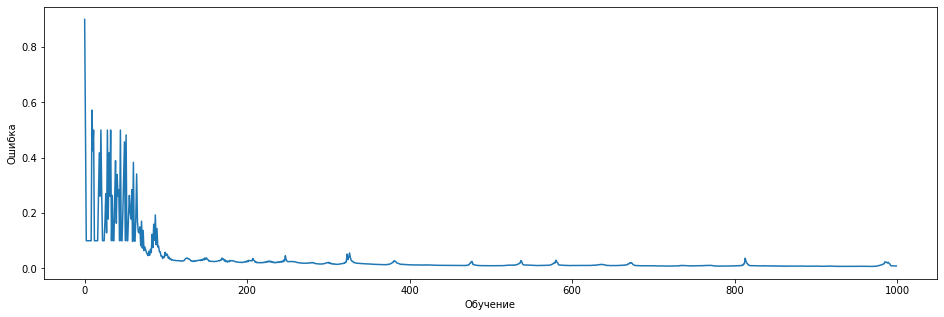

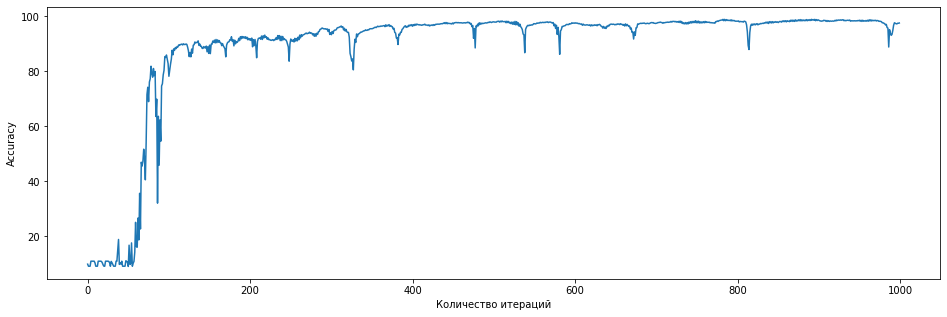

Число нейронов скрытого слоя = 50
Cкорость обучения = 0.01
Количество итераций = 100
Accuracy на трейне  = 95.09559434746467


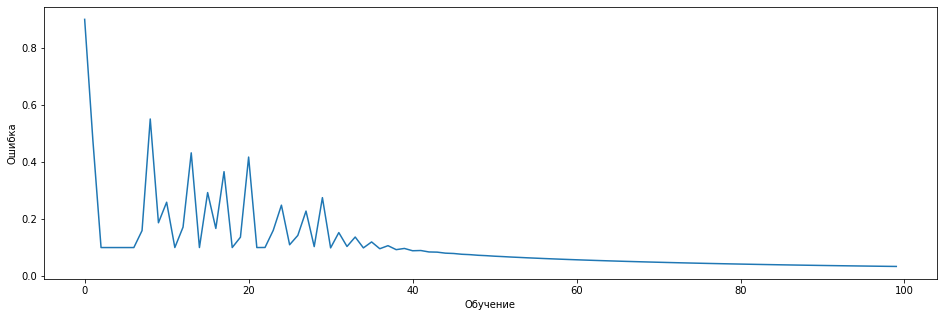

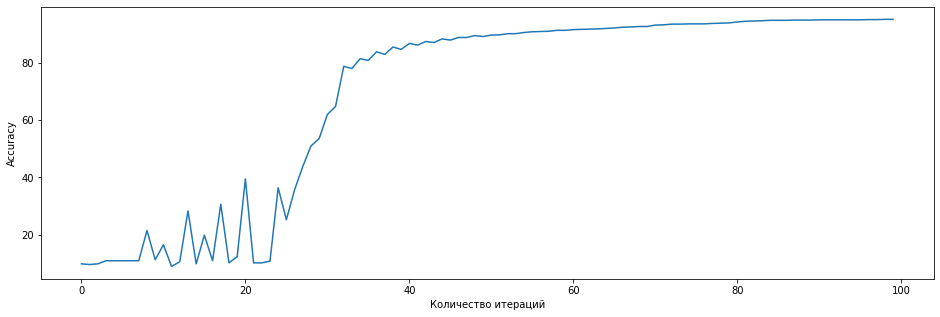

Число нейронов скрытого слоя = 50
Cкорость обучения = 0.01
Количество итераций = 300
Accuracy на трейне  = 98.75311720698254


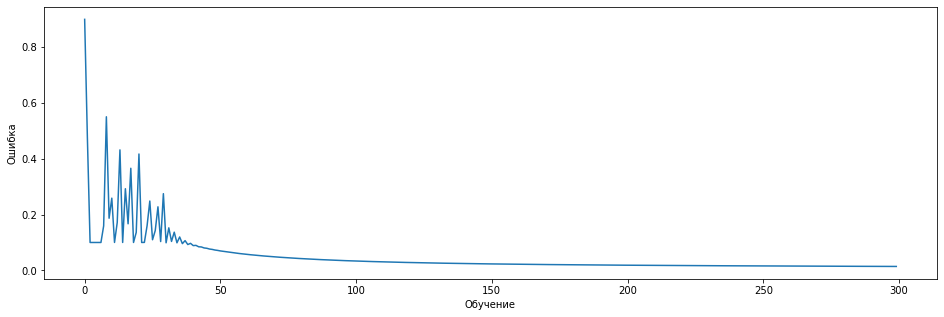

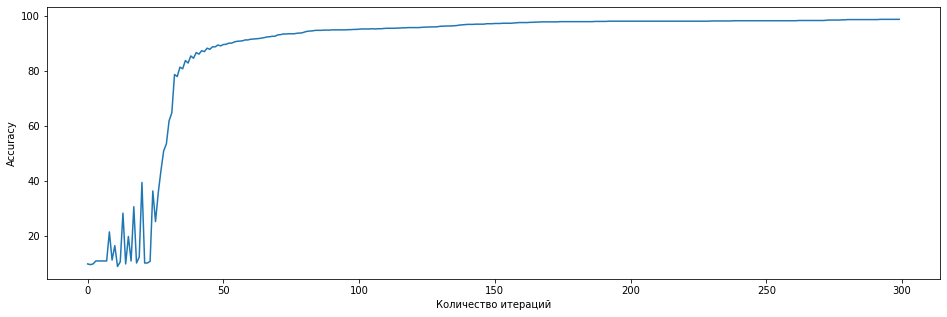

Число нейронов скрытого слоя = 50
Cкорость обучения = 0.01
Количество итераций = 500
Accuracy на трейне  = 99.33499584372403


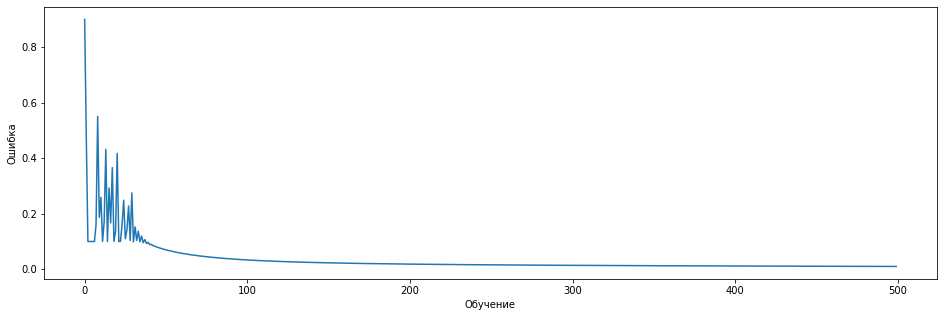

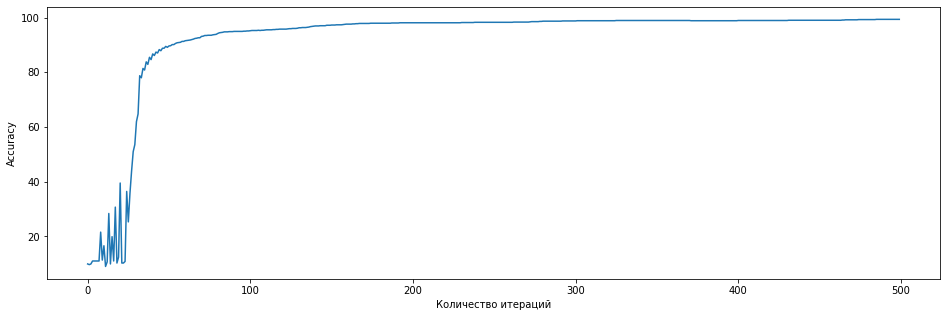

Число нейронов скрытого слоя = 50
Cкорость обучения = 0.01
Количество итераций = 1000
Accuracy на трейне  = 99.91687448046551


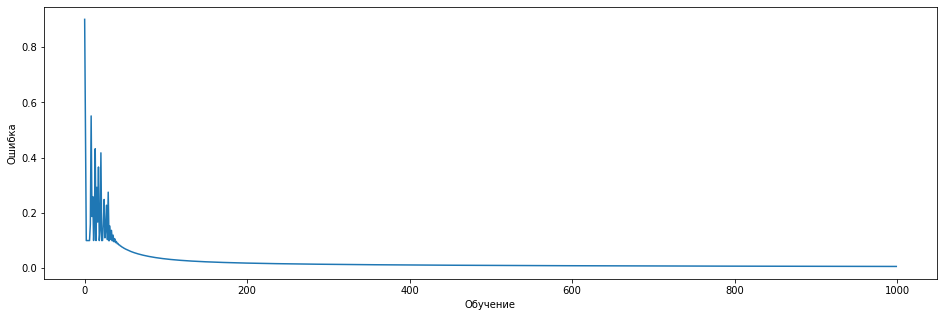

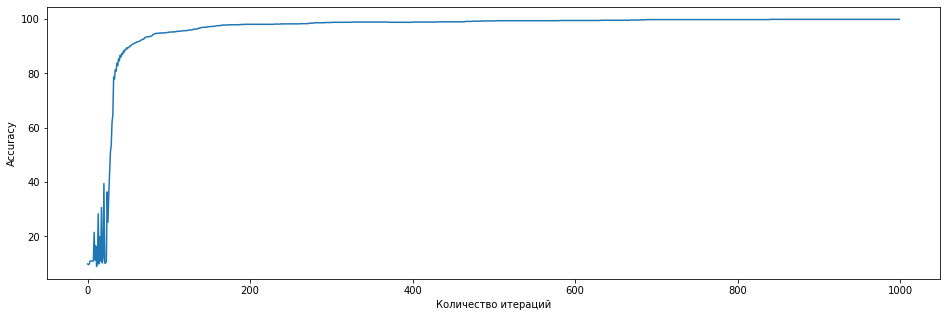

Число нейронов скрытого слоя = 50
Cкорость обучения = 0.001
Количество итераций = 100
Accuracy на трейне  = 23.44139650872818


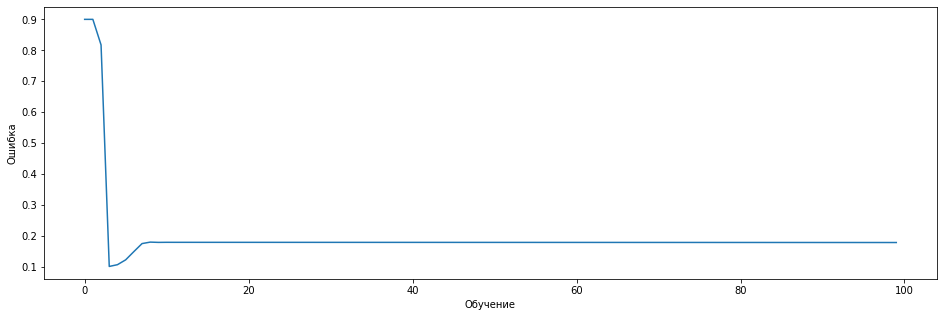

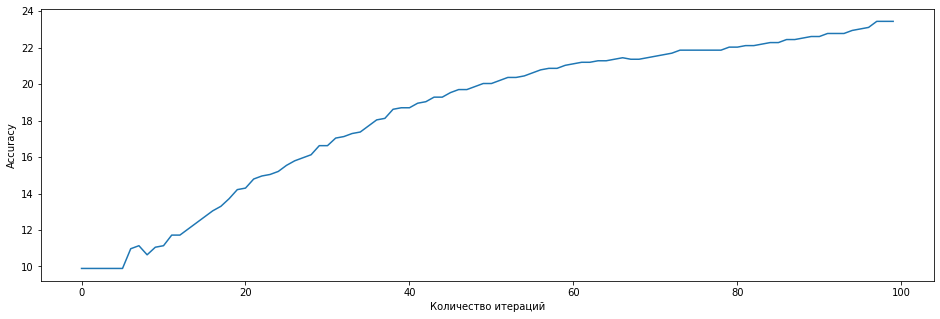

Число нейронов скрытого слоя = 50
Cкорость обучения = 0.001
Количество итераций = 300
Accuracy на трейне  = 62.42726517040732


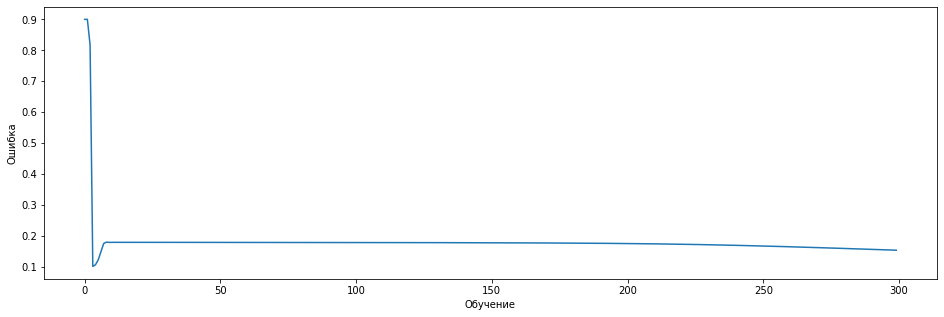

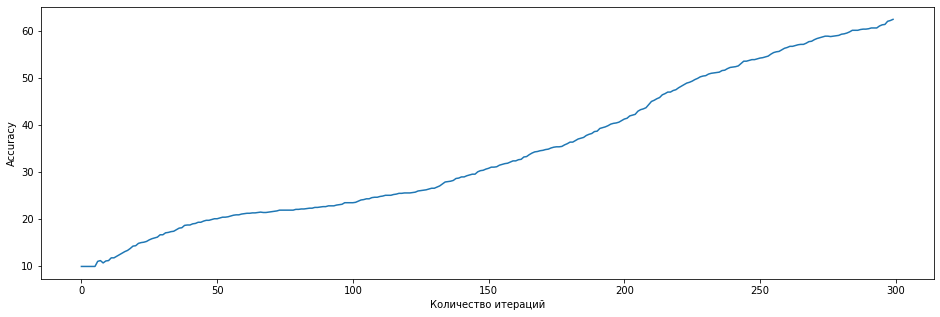

Число нейронов скрытого слоя = 50
Cкорость обучения = 0.001
Количество итераций = 500
Accuracy на трейне  = 80.2161263507897


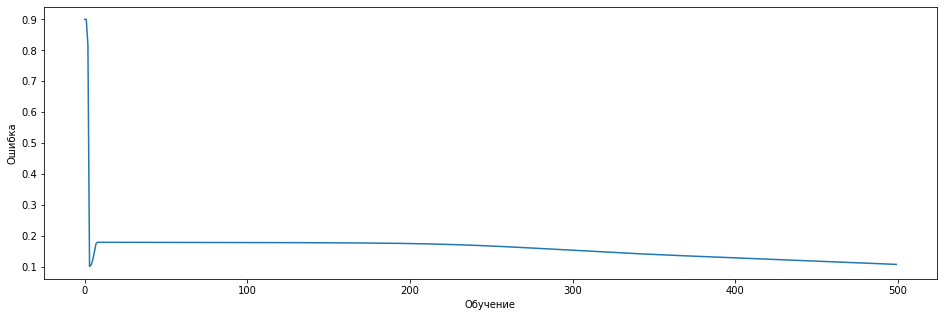

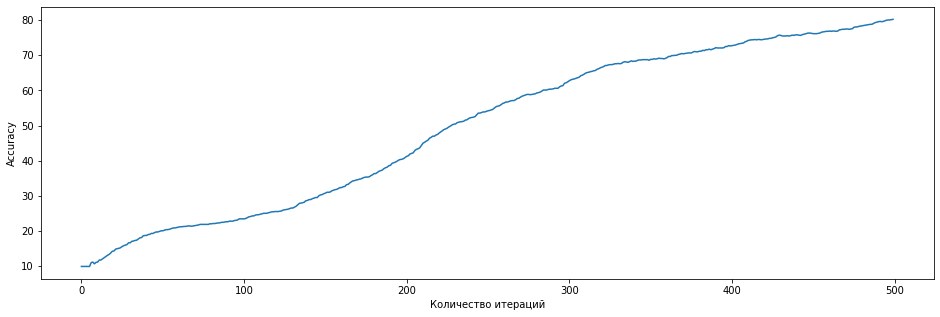

Число нейронов скрытого слоя = 50
Cкорость обучения = 0.001
Количество итераций = 1000
Accuracy на трейне  = 91.4380714879468


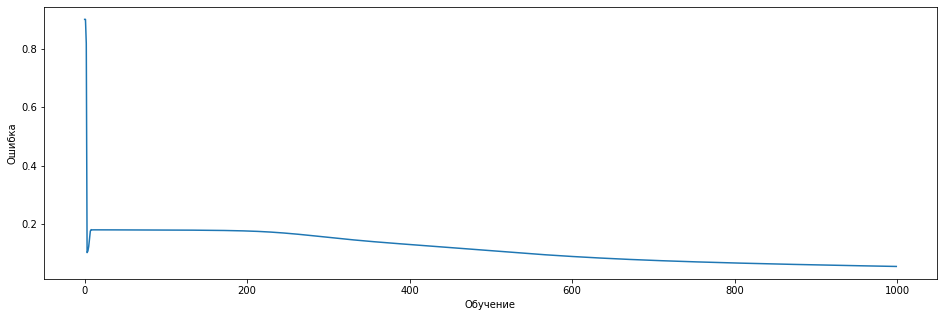

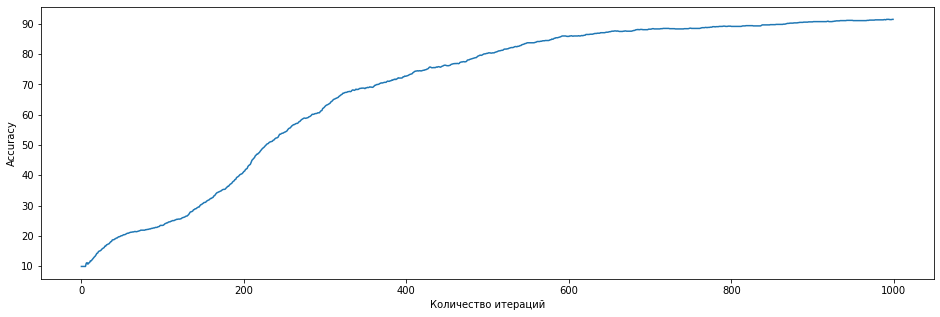

Лучшие параметры:
Число нейронов скрытого слоя: 50
Скорость обучения: 0.01
Число итераций: 1000
Accuracy: 99.91687448046551


In [23]:
# лучшее число нейронов скрытого слоя
best_numb = 0
# лучшая скорость обучения (learning rate)
best_rate = 0
# лучшчее количество итераций
best_epoch = 0
w_0_best = 0
w_1_best = 0
best_errors = []
best_metrics = [] 
best_accuracy = 0

for numb in neuron_numb:
  for rate in learning_rate:
    for epoch in num_epochs:
      w0, w1, errors, metrics, accuracy = neural_network_fit(X_train = X_train, y_train = y_train, neuron_numb = numb, learning_rate = rate, num_epochs = epoch)
      print (f'Число нейронов скрытого слоя = {numb}')
      print (f'Cкорость обучения = {rate}')
      print (f'Количество итераций = {epoch}')
      print (f'Accuracy на трейне  = {accuracy}')
      # Демонстрация полученных результатов
      # Диаграмма точности в зависимости от обучения
      plt.figure(figsize=(16, 5))
      plt.plot(errors)
      plt.xlabel('Обучение')
      plt.ylabel('Ошибка')
      plt.show()

      plt.figure(figsize=(16, 5))
      plt.plot(metrics)
      plt.xlabel('Количество итераций')
      plt.ylabel('Accuracy')
      plt.show() 
      if accuracy > best_accuracy:
        w_0_best, w_1_best, best_errors, best_metrics, best_accuracy = w0, w1, errors, metrics, accuracy
        best_numb, best_rate, best_epoch = numb, rate, epoch

print ('Лучшие параметры:')
print (f'Число нейронов скрытого слоя: {best_numb}')
print (f'Скорость обучения: {best_rate}')
print (f'Число итераций: {best_epoch}')
print (f'Accuracy: {best_accuracy}')

###Лучшие параметры:

Число нейронов скрытого слоя: 50

Скорость обучения: 0.01

Число итераций: 1000

Accuracy: 99.91687448046551

####Еще раз обучим сеть на лучших параметрах

In [30]:
w0, w1, errors, metrics, accuracy = neural_network_fit(X_train = X_train, y_train = y_train, neuron_numb = 50, learning_rate = 0.01, num_epochs = 1000)

In [31]:
accuracy 

99.91687448046551

In [32]:
y_train[:10]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

#### Оценим результаты

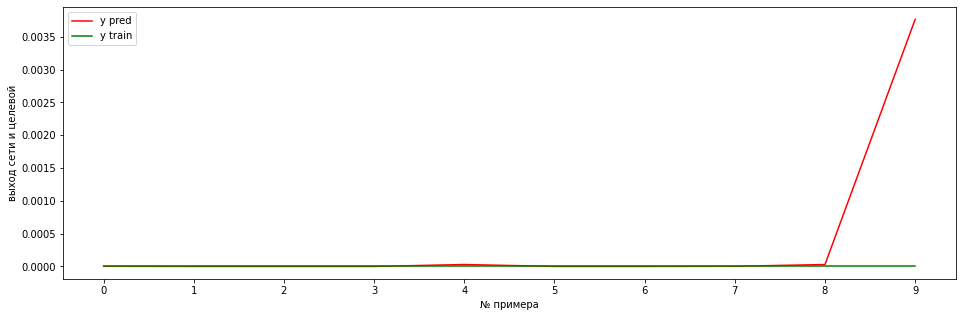

accuracy на обучении 99.92%


In [33]:
N = 10
label = 2
plt.figure(figsize=(16, 5))
plt.plot(layer2[:N, label], 'r', label='y pred')
plt.plot(y_train[:N, label],'g', label='y train')
plt.xticks(np.arange(N))
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend()
plt.show()
        
print(f"accuracy на обучении {accuracy:.2f}%")

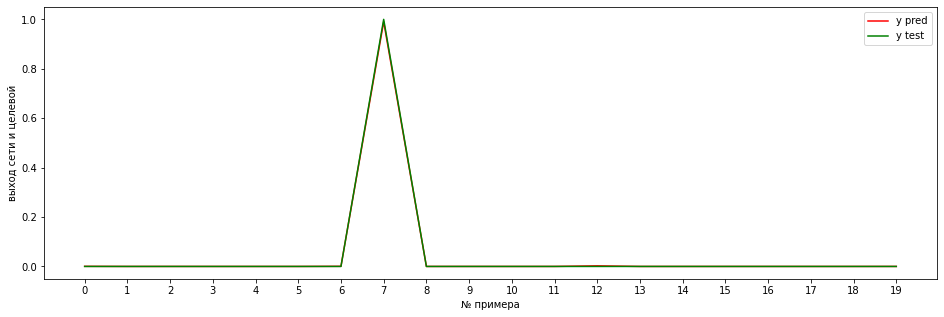

accuracy на тесте 95.45%


In [34]:
# прямое распространение(feed forward)
layer0_test = X_test
layer1_test = sigmoid(np.dot(layer0_test, w0))
layer2_test = sigmoid(np.dot(layer1_test, w1))
    
    
N = 20
plt.figure(figsize=(16, 5))
plt.plot(layer2_test[:N, 1], 'r', label='y pred')
plt.plot(y_test[:N, 1], 'g', label='y test')
plt.xticks(np.arange(N))
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend()
plt.show()

# метрика модели
preds_test = np.argmax(layer2_test, axis=1)
labels_test = np.argmax(y_test, axis=1)
accuracy_test = (preds_test == labels_test).sum() * 100 / len(labels_test)

print(f"accuracy на тесте {accuracy_test:.2f}%")

## Выводы <a class='anchor' id='hw'>

Исходя из проведенного исследования, наилучшими оказались параметры:

**Лучшие параметры:**

Число нейронов скрытого слоя: 50

Скорость обучения: 0.01

Число итераций: 1000

Accuracy: 99.91687448046551

Возможно, слишком высокая скорость обучения ухудшает сходимость градиетного спуска. Также небольшое количество нейронов и маленькое количество итераций не позволяет достить высокой точности. 

Таким образом, получилось, что наилучшие результаты достигнуты при максимальном количестве нейронов скрытого слоя из исследуемых параметров = 50, а также максимальном числе итераций = 1000. При этом лучшей скоростью обучения оказалась средняя из исследуемых параметров = 0.01. Соответственно, можно сделать вывод, что увеличение количества нейронов и числа итераций приводят к улучшению результата работы нейросети. Слишком маленькая скорость обучения приводит к тому, что нейросеть не успевает достигнуть лучшего результата, а слишком большая - к тому, что можно "проскочить" минимальную ошибку (как и в линенейной регрессии). Соответсвенно, средний параметр оказался наилучшим. 